<!-- 
<div style="background-image: url('https://cdn.visualwilderness.com/wp-content/uploads/2019/05/Mothership-VW.jpg'); background-size: cover; background-position: center; padding: 20px; height: 500px; border-radius: 20px;">
    <h1 style="font-weight: bold; font-size: 60px; font-family: avenir; color: white; ">Flood Prediction</h1> -->


<div style="position: relative; padding: 20px; border-radius: 20px;">
    <img src="https://avatars.mds.yandex.net/i?id=28a59626e19adf2cce06fdfc0d34d16538e1c633-5276035-images-thumbs&n=13" alt="bank" style="width: 100%; height: 100%; object-fit: cover; border-radius: 20px;">
    <h1 style="position: absolute; top: 50%; left: 60%; transform: translate(-50%, -50%); font-weight: bold; font-size: 60px; font-family: avenir; color: white; "></h1>
</div>

<!-- https://gazeta-rk.ru/wp-content/uploads/2023/08/gendernye-predrassudki.jpg -->



<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

# **Исследование Надежности Заёмщиков**

## **Цель Исследования**

**Определить, как различные характеристики клиента влияют на вероятность своевременного погашения кредита.**



## **Вопросы для Исследования**

1. **Влияет ли количество детей на своевременный возврат кредита?**
2. **Влияет ли семейное положение на своевременный возврат кредита?**
3. **Влияет ли уровень дохода на своевременный возврат кредита?**
4. **Влияют ли цели кредита на его своевременный возврат?**
5. **Какой алгоритм машинного обучения лучше всего подходит для предсказания вероятности возврата кредита в срок?**
6. **Как влияет балансировка классов на производительность модели?**
7. **Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?**

## **Ход Исследования**

### **Входные данные**

**Файл:** `data.csv` _(статистика о платёжеспособности клиентов)._

### **Этапы Исследования**

1. **Обзор данных**
    - **Проверка на наличие ошибок.**
    - **Оценка качества данных и их влияния на исследование.**
  
2. **Предобработка данных**
    - **Исправление критичных ошибок для повышения качества данных.**
  
3. **Анализ данных и ответы на вопросы**
    - **Изучение зависимостей между характеристиками клиентов и своевременным возвратом кредита.**
    - **Оценка различных алгоритмов машинного обучения для предсказания вероятности возврата кредита в срок.**
    - **Анализ влияния балансировки классов на производительность моделей.**
    - **Определение наиболее значимых признаков для модели классификации целевой переменной `'debt'`.**
    - **Снижение размерности данных**

---

### **Этап 1: Обзор данных**

**Проведем детальный анализ данных, выявим и оценим ошибки, чтобы понять их влияние на наше исследование.**

### **Этап 2: Предобработка данных**

**Исправим наиболее критичные ошибки, чтобы гарантировать точность и надежность нашего анализа.**

### **Этап 3: Анализ данных и ответы на вопросы**

**Проанализируем данные, чтобы дать точные ответы на следующие ключевые вопросы:**

- **Количество детей:** _Влияет ли оно на своевременный возврат кредита?_
- **Семейное положение:** _Как оно влияет на способность клиента вернуть кредит вовремя?_
- **Уровень дохода:** _Есть ли корреляция между доходом и возвратом кредита в срок?_
- **Цели кредита:** _Как разные цели займа отражаются на его возврате в срок?_
- **Алгоритмы машинного обучения:** _Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?_
- **Балансировка классов:** _Как она влияет на производительность модели?_
- **Значимые признаки:** _Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?_
- **Снижение размерности:** _Как можно понизить размерность данных?_

---

_Проведенное исследование улучшит модель кредитного скоринга, значительно повысив точность оценки платёжеспособности потенциальных заёмщиков, что, в свою очередь, снизит риски банка и улучшит качество предоставляемых кредитных услуг._

<div style="padding: 10px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; color: white">

    
## Импорт Библиотек

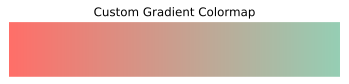

In [1]:
# Ignore Warnings
import warnings

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from shap import Explanation

# Data Transformation
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split


# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion  # Импорт классов Pipeline и make_pipeline из scikit-learn
from sklearn.base import BaseEstimator, TransformerMixin  # Импорт базовых классов BaseEstimator и TransformerMixin

# Rebalancing Data  
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from collections import Counter

# Algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

# Validation
from sklearn.model_selection import StratifiedKFold

# Lemmatization
from pymystem3 import Mystem
from collections import Counter

# Metrics
from sklearn.metrics import (f1_score, roc_auc_score, roc_curve, precision_score, 
                            classification_report, precision_recall_curve, confusion_matrix, 
                            accuracy_score, recall_score, auc, r2_score)

# Binning
from optbinning import OptimalBinning


# Feature Reduction
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator


# Gradient Genrator
from matplotlib.colors import LinearSegmentedColormap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')  # Disabling warning outputs

# Определение цветовых кодов в формате HEX
colors = ['#ff6f69', '#96ceb4']

# Преобразование цветовых кодов в формат RGB
colors_rgb = [tuple(int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)) for color in colors]

# Создание цветовой карты LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors_rgb)

# Создание градиента от 0 до 1
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Отображение градиента с использованием созданной цветовой карты
plt.figure(figsize=(6, 1))
plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis('off')
plt.title('Custom Gradient Colormap')
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">

<a id='menu'></a>
    
### Структура Проекта

1. [**Обзор данных**](#first): Проведем детальный анализ данных, выявим и оценим ошибки, чтобы понять их влияние на наше исследование.
2. [**Предобработка данных**](#second): Исправим наиболее критичные ошибки, чтобы гарантировать точность и надежность нашего анализа.
   - [**Предобработка признака `children`**](#children)
   - [**Предобработка признака `days_employed`**](#days_employed)
   - [**Предобработка признака `dob_years`**](#dob_years)
   - [**Предобработка признака `education`**](#education)
   - [**Предобработка признака `family_status`**](#family_status)
   - [**Предобработка признака `gender`**](#gender)
   - [**Предобработка признака `purpose`**](#purpose)
   - [**Обработка пропущенных значений**](#miss)
   - [**Визуализация распределений признаков**](#visual)
4. [**Анализ данных и ответы на вопросы**](#third): 
   - [**Количество детей**](#fourth): Влияет ли оно на своевременный возврат кредита?
   - [**Семейное положение**](#fifth): Как оно влияет на способность клиента вернуть кредит вовремя?
   - [**Уровень дохода**](#sixth): Есть ли корреляция между доходом и возвратом кредита в срок?
   - [**Цели кредита**](#seventh): Как разные цели займа отражаются на его возврате в срок?
   - [**Балансировка классов**](#eighth): Как она влияет на производительность модели?
   - [**Алгоритмы машинного обучения**](#nineth): Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?
   - [**Значимые признаки**](#tenth): Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной `'debt'`?
   - [**Снижение размерности**](#eleventh): Как можно понизить размерность данных?
5. [**Общие выводы**](#end)


<div style="padding: 10px; width: 450px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='first'></a> **Этап 1: Обзор данных**
[**Главное меню**](#menu)

In [2]:
# Прописываем путь к файлу `data.csv`
DATAPATH = './data/data.csv'

# Read the training data into a pandas DataFrame
df = pd.read_csv(DATAPATH)

In [3]:
# Отображаем первые 5 наблюдений
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
# Printing out the column names of the dataframe.
print(df.columns)


Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
### **Описание Данных**


- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

In [5]:
# Получаем размерность DataFrame
shape = df.shape  

# Печатаем размерность DataFrame
print(shape)      


(21525, 12)


In [6]:
# Вывод общей информации о DataFrame
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
# Вывод типов данных всех столбцов в DataFrame
df.dtypes


children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [8]:
# Рассчитать сумму пропущенных значений для каждого столбца и сбросить индекс, сохраняя результат в новом DataFrame под названием 'isna'
isna = df.isna().sum().reset_index(name="missing_values")

# Рассчитать процент пропущенных значений для каждого столбца и добавить его в виде нового столбца под названием 'percentage'
# в DataFrame 'isna'
isna['percentage'] = round((isna['missing_values'] / df.shape[0]) * 100, 2)

# Отсортировать DataFrame 'isna' по столбцу 'missing_values' в порядке убывания
isna.sort_values(by='missing_values', ascending=False)



,index,missing_values,percentage
1,days_employed,2174,10.1
10,total_income,2174,10.1
0,children,0,0.0
2,dob_years,0,0.0
3,education,0,0.0
4,education_id,0,0.0
5,family_status,0,0.0
6,family_status_id,0,0.0
7,gender,0,0.0
8,income_type,0,0.0


In [9]:
# Вывод статистического описания DataFrame
df.describe()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [10]:
# Вывод статистического описания для всех столбцов типа 'object' в DataFrame
df.describe(include='object')


,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,13750,12380,14236,11119,797


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir;">
    
**Из данных выше, можно выявить несколько аномалий:**

1. **Количество детей (`children`)**:
   - Минимальное значение `-1.000000` является аномальным, так как количество детей не может быть отрицательным.
   - Максимальное значение `20.000000` также выглядит подозрительно высоким и может потребовать дополнительной проверки, хотя в редких случаях это возможно.

2. **Стаж работы (`days_employed`)**:
   - Минимальное значение `-18388.949901` является аномальным, так как стаж работы не может быть отрицательным.
   - Максимальное значение `401755.400475` также подозрительно высоко. Это значение примерно соответствует 1100 годам, что невозможно.
   - Есть предположение, что эти данные указаны в часах.

3. **Возраст (`dob_years`)**:
   - Минимальное значение `0.000000` указывает на аномалию, так как возраст не может быть равен нулю.
   - Среднее значение и стандартное отклонение в этом столбце выглядят нормальными, но значение 0 требует коррекции.

4. **Общий доход (`total_income`)**:
   - Минимальное значение `20667.26` и максимальное значение `2265604.00` могут быть корректными, но учитывая большое стандартное отклонение, следует провести дополнительную проверку на выбросы.


### Обобщённые шаги для обработки этих аномалий:

1. **Удаление или исправление некорректных значений**:
   - Количество детей: заменить отрицательные значения на положительные.
   - Стаж работы: заменить отрицательные значения на положительные, обработать пропуски.
   - Возраст: заменить значения `0` на медианное или удалить значение.

2. **Проверка выбросов**:
   - Провести дополнительный анализ для подтверждения или исключения подозрительно высоких значений (например, количество детей больше 10, стаж работы, общий доход больше 1 млн.).

3. **Верификация данных**:
   - Сравнить данные с известными нормативами или провести логическую проверку на основе других атрибутов (например, возраст и стаж работы).


<div style="padding: 10px; width: 500px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='second'></a>**Шаг 2. Предобработка данных**
[**Главное меню**](#menu)

In [11]:
# Подсчет количества дублирующихся и уникальных строк в DataFrame
df.duplicated().value_counts()



False    21471
True        54
Name: count, dtype: int64

In [12]:
# удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()    # проверка

0

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">

### <a id='children'></a>**Предобработка признака `children`**

[**Главное меню**](#menu)

In [13]:
# Подсчет количества уникальных значений в столбце 'children' DataFrame
df['children'].value_counts()


children
 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: count, dtype: int64

In [14]:
# Применение функции для получения абсолютного значения к столбцу 'children' в DataFrame
df['children'] = df['children'].apply(lambda x: abs(x))

# Замена значений 20 в столбце 'children' на целочисленное деление на 10 для соответствия предполагаемому формату
df.loc[df['children'] == 20, 'children'] = df.loc[df['children'] == 20, 'children'] // 10

# Подсчет количества уникальных значений в столбце 'children' DataFrame после обработки
df['children'].value_counts()


children
0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='days_employed'></a>**Предобработка признака `days_employed`**

[**Главное меню**](#menu)

In [15]:
# Применение функции для получения абсолютного значения к столбцу 'days_employed' в DataFrame
df['days_employed'] = df['days_employed'].apply(lambda x: abs(x))


In [16]:
# Вывод минимального и максимального значений столбца 'days_employed' в DataFrame
print(df['days_employed'].min(), df['days_employed'].max())

# Вывод максимального значения столбца 'days_employed' после перевода его из дней в годы
print(df['days_employed'].max() // 24 // 365)


24.14163324048118 401755.40047533
45.0


In [17]:
# Округление значений столбца 'days_employed' до целых чисел, представляющих количество отработанных дней в годах
df['days_employed'] = round(df['days_employed'] / 24, 0)

# Вычисление и округление значений столбца 'years_employed', представляющих количество отработанных лет
df['years_employed'] = round(df['days_employed'] / 365, 0)


In [18]:
# Вывод первых нескольких строк DataFrame 'df' для проверки результатов изменений
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,352.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,1.0
1,1,168.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,0.0
2,0,234.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,1.0
3,3,172.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,0.0
4,0,14178.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,39.0


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='dob_years'></a>**Предобработка признака `dob_years`**

[**Главное меню**](#menu)

In [19]:
# Подсчет количества уникальных значений в столбце 'dob_years' DataFrame и сортировка по индексу, вывод первых строк
df['dob_years'].value_counts().sort_index().head()


dob_years
0     101
19     14
20     51
21    111
22    183
Name: count, dtype: int64

In [20]:
# Фильтрация DataFrame 'df', исключая строки, где значение столбца 'dob_years' равно 0, сброс индекса
df = df.loc[df['dob_years'] != 0].reset_index(drop=True).copy()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='education'></a>**Предобработка признака `education`**

[**Главное меню**](#menu)

In [21]:
# Подсчет количества уникальных значений в столбце 'education' DataFrame
df['education'].value_counts()


education
среднее                13646
высшее                  4678
СРЕДНЕЕ                  770
Среднее                  708
неоконченное высшее      666
ВЫСШЕЕ                   272
Высшее                   266
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: count, dtype: int64

In [22]:
# Приведение значений столбца 'education' к нижнему регистру
df['education'] = df['education'].str.lower()

# Подсчет количества уникальных значений в столбце 'education' DataFrame после приведения к нижнему регистру
df['education'].value_counts()


education
среднее                15124
высшее                  5216
неоконченное высшее      742
начальное                282
ученая степень             6
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='family_status'></a>**Предобработка признака `family_status`**

[**Главное меню**](#menu)

In [23]:
# Подсчет количества уникальных значений в столбце 'family_status' DataFrame до приведения к нижнему регистру
df['family_status'].value_counts()



family_status
женат / замужем          12295
гражданский брак          4142
Не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: count, dtype: int64

In [24]:
# Приведение значений столбца 'family_status' к нижнему регистру
df['family_status'] = df['family_status'].str.lower()

# Подсчет количества уникальных значений в столбце 'family_status' DataFrame после приведения к нижнему регистру
df['family_status'].value_counts()


family_status
женат / замужем          12295
гражданский брак          4142
не женат / не замужем     2794
в разводе                 1185
вдовец / вдова             954
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='gender'></a>**Предобработка признака `gender`**

[**Главное меню**](#menu)

In [25]:
# Вывод уникальных значений столбца 'gender' DataFrame
print(df['gender'].unique())

# Фильтрация DataFrame 'df', исключая строки, где значение столбца 'gender' равно 'XNA'
df = df.loc[df['gender'] != 'XNA']

# Подсчет количества уникальных значений в столбце 'gender' DataFrame после фильтрации
df['gender'].value_counts()


['F' 'M' 'XNA']


gender
F    14117
M     7252
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='purpose'></a>**Предобработка признака `purpose`**

[**Главное меню**](#menu)

#### **Стандартизация целей кредитования через Лемматизацию**

In [26]:
# проводим лемматизацию значений столбца с целями кредита
m = Mystem()

# с помощью контейнера Counter подсчитаем частоту упоминаний слов в тексте
Counter(m.lemmatize(' '.join(df['purpose'])))

Counter({' ': 54828,
         'недвижимость': 6329,
         'покупка': 5872,
         'жилье': 4437,
         'автомобиль': 4286,
         'образование': 3996,
         'с': 2904,
         'операция': 2593,
         'свадьба': 2321,
         'свой': 2224,
         'на': 2216,
         'строительство': 1874,
         'высокий': 1366,
         'получение': 1310,
         'коммерческий': 1307,
         'для': 1287,
         'жилой': 1225,
         'сделка': 938,
         'дополнительный': 903,
         'заниматься': 900,
         'подержать': 849,
         'проведение': 769,
         'сыграть': 764,
         'сдача': 650,
         'семья': 637,
         'собственный': 633,
         'со': 627,
         'ремонт': 605,
         'приобретение': 459,
         'профильный': 435,
         'подержанный': 113,
         '\n': 1})

In [27]:
# Применение лемматизации к столбцу 'purpose'
df['lemmas'] = df['purpose'].apply(lambda x: m.lemmatize(x))

# Функция для определения основной цели кредита
def main_purpose(row):
    if 'недвижимость' in row or 'жилье' in row:
        return 'недвижимость'
    if 'автомобиль' in row:
        return 'автомобиль' 
    if 'свадьба' in row:
        return 'свадьба'
    if 'образование' in row:
        return 'образование'
    return 'другое'

# Применение функции main_purpose к столбцу 'lemmas' для определения основной цели кредита
df['main_purpose'] = df['lemmas'].apply(main_purpose)

# Вывод количества значений по каждой основной цели кредита
print(df['main_purpose'].value_counts())

main_purpose
недвижимость    10766
автомобиль       4286
образование      3996
свадьба          2321
Name: count, dtype: int64


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='miss'></a>**Обработка пропущенных значений**

[**Главное меню**](#menu)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
    
Для обработки пропущенных значений мной были выбраны несколько стратегий:

1. **Признак - days\_employed**
   - Обучение модели на имеющихся данных с целью заполнения пропусков.

2. **Признак - years\_employed**
   - Приведение к общему виду, разделив на 365.

3. **Признак - total\_income**
   - Заполнение пропущенных значений медианными.

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Обучение модели на имеющихся данных с целью заполнения пропусков в признаке `days_employed`**

In [28]:
# Фильтрация исходного DataFrame 'df' для создания X_initial, исключая строки с образованием 'ученая степень' и типами дохода 'безработный', 'в декрете', 'студент'
X_initial = df.loc[(df['education'] != 'ученая степень') & (~df['income_type'].isin(['безработный', 'в декрете', 'студент']))]

# Фильтрация X_initial для создания X, исключая строки с пропущенными значениями в столбце 'days_employed' и определенные столбцы
X = X_initial.loc[X_initial['days_employed'].notna()].drop(columns=['days_employed', 'lemmas', 'purpose',
                                                                    'total_income', 'years_employed'])

# Создание X_encoded с использованием кодирования категориальных признаков в DataFrame X
X_encoded = pd.get_dummies(X)

# Фильтрация X_initial для создания y, содержащего значения столбца 'days_employed' без пропущенных значений
y = X_initial.loc[X_initial['days_employed'].notna(), 'days_employed']

# Создание TEST путем фильтрации X_initial, исключая строки с пропущенными значениями в столбце 'days_employed' и определенные столбцы
TEST = X_initial.loc[X_initial['days_employed'].isna()].drop(columns=['days_employed', 'lemmas', 'purpose',
                                                                      'total_income', 'years_employed'])


In [29]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Определение модели LightGBM с заданными параметрами
model = LGBMRegressor(verbosity=-1)

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Вычисление коэффициента детерминации (R^2)
r2 = r2_score(y_test, y_pred)

print(f"Коэффициент детерминации (R^2): {r2:.4f}")


Коэффициент детерминации (R^2): 0.9954


In [30]:
# Создание DataFrame с важностью признаков
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).reset_index(drop=True)

# Сортировка по важности признаков
sorted_feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Нормализация важности признаков
normalized_feature_importances_df = sorted_feature_importances_df.apply(lambda x: x['Importance'] / len(X_train), axis=1)

# Создание нового DataFrame с отфильтрованными ненулевыми значениями важности признаков
normalized_feature_importances_df = pd.DataFrame({
    'Feature': sorted_feature_importances_df['Feature'],
    'Importance': normalized_feature_importances_df
}).reset_index(drop=True)

# Фильтрация признаков, исключая те, у которых важность равна нулю
resulting_features = normalized_feature_importances_df.loc[normalized_feature_importances_df['Importance'] != 0]

print(resulting_features)


                           Feature  Importance
0                        dob_years    0.107986
1                 family_status_id    0.022414
2        main_purpose_недвижимость    0.014843
3                     education_id    0.010910
4            income_type_пенсионер    0.008683
5                         gender_F    0.008312
6          main_purpose_автомобиль    0.007941
7         main_purpose_образование    0.007125
8                         children    0.007051
9                education_среднее    0.004453
10  family_status_гражданский брак    0.004305
11    family_status_вдовец / вдова    0.004008
12                            debt    0.003934
13            main_purpose_свадьба    0.002820
14         family_status_в разводе    0.002152
15           income_type_сотрудник    0.001855
16         income_type_госслужащий    0.001781
17           income_type_компаньон    0.001484
18   education_неоконченное высшее    0.000594


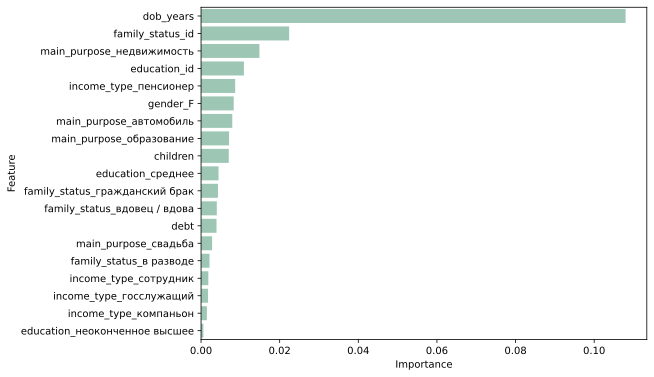

In [31]:
# Создание графика с указанным размером
plt.figure(figsize=(8, 6))

# Создание barplot с использованием данных resulting_features
ax = sns.barplot(data=resulting_features, x='Importance', y='Feature', palette=['#96ceb4'])

# Отображение графика
plt.show()

In [32]:
# Кодирование категориальных признаков в DataFrame TEST с помощью pd.get_dummies()
TEST_encoded = pd.get_dummies(TEST)

# Вывод первых нескольких строк TEST_encoded для проверки результатов кодирования
TEST_encoded.head()


,children,dob_years,education_id,family_status_id,debt,education_высшее,education_начальное,education_неоконченное высшее,education_среднее,family_status_в разводе,...,gender_M,income_type_госслужащий,income_type_компаньон,income_type_пенсионер,income_type_предприниматель,income_type_сотрудник,main_purpose_автомобиль,main_purpose_недвижимость,main_purpose_образование,main_purpose_свадьба
12,0,65,1,1,0,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True
26,0,41,1,0,0,False,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
29,0,63,1,4,0,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
41,0,50,1,0,0,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
55,0,54,1,1,1,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [33]:
# Прогнозирование значений 'days_employed' с использованием обученной модели на закодированных данных TEST_encoded
y_target = model.predict(TEST_encoded)

# Замена соответствующих значений 'days_employed' в исходном DataFrame df на предсказанные значения
df.loc[TEST.index, 'days_employed'] = y_target


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Заполнение пропусков в признаке `years_employed`**

In [34]:
# Вычисление и присвоение значений 'years_employed' в исходном DataFrame df для строк, находящихся в TEST.index,
# путем деления значений 'days_employed' на 365 и округления до целых чисел
df.loc[TEST.index, 'years_employed'] = df.loc[TEST.index, 'days_employed'] // 365


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Заполнение пропусков в признаке `total_income`**

In [35]:
# Заполнение пропущенных значений в столбце 'total_income' исходным медианным значением
df['total_income'].fillna(df['total_income'].median(), inplace=True)


In [36]:
# Подсчет количества пропущенных значений в каждом столбце DataFrame df
df.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
lemmas              0
main_purpose        0
dtype: int64

In [37]:
# Преобразование столбца 'years_employed' в тип данных int в DataFrame df
df['years_employed'] = df['years_employed'].astype(int)


In [38]:
# Получение уникальных комбинаций столбцов 'family_status_id' и 'family_status', исключая дубликаты, и сброс индекса
df[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [39]:
# Получение уникальных комбинаций столбцов 'education_id' и 'education', исключая дубликаты, и сброс индекса
df[['education_id', 'education']].drop_duplicates().reset_index(drop=True)


,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [40]:
BASE_FEATURES = ['children', 'days_employed', 'dob_years', 'education', 'education_id', 'family_status',
                 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']

CATEGORICAL_FEATURES = ['education', 'family_status', 'income_type', 'main_purpose', 'gender']

NUMERIC_FEATURES = ['children', 'years_employed', 'dob_years', 'total_income']

TARGET_FEATURE = 'debt'

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
### <a id='visual'></a> Визуализация распределений признаков.

[**Главное меню**](#menu)

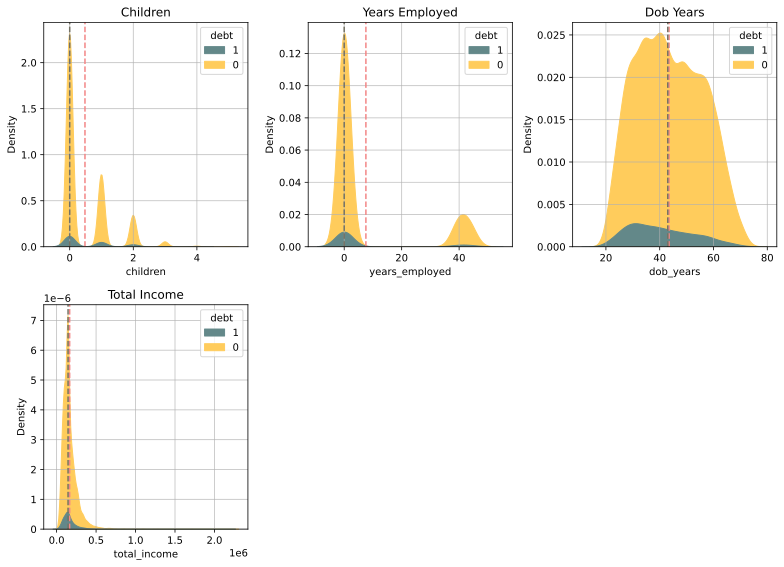

In [41]:
# Выбор числовых признаков и целевого признака
selected_columns = NUMERIC_FEATURES + [TARGET_FEATURE]

# Создание DataFrame numerics, содержащего только выбранные столбцы
numerics = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(numerics.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графика с заданным размером
plt.figure(figsize=(11, 4 * num_rows))

# Построение графиков для каждого столбца из numerics, исключая 'debt'
for i, col in enumerate(numerics.drop(columns=['debt']), 1):
    target_counts = numerics['debt'].value_counts()
    hue_order = reversed(target_counts.index)
    
    plt.subplot(num_rows, num_columns, i)  # Создание subplot
    mean_value = numerics[col].mean()
    median_value = numerics[col].median()

    sns.kdeplot(data=numerics, x=col, fill=True, hue='debt', palette=['#638889', '#ffcc5c', '#f28585'], alpha=1, hue_order=hue_order)

    plt.axvline(x=mean_value, color='#F28585', linestyle='--', label='Mean')
    plt.axvline(x=median_value, color='#747264', linestyle='--', label='Median')

    plt.grid(True, alpha=0.8)  # Добавление сетки на график
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))}')  # Установка заголовка

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графика


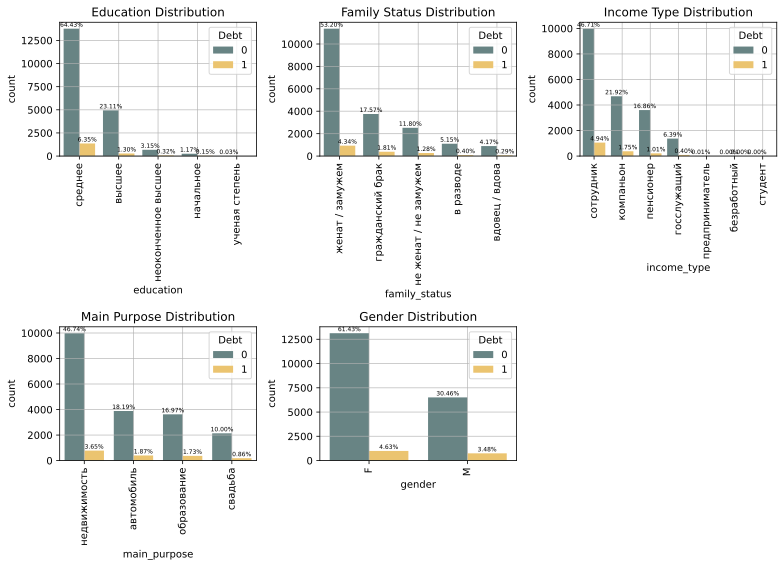

In [42]:
# Выбор категориальных признаков и целевого признака
selected_columns = CATEGORICAL_FEATURES + [TARGET_FEATURE]

# Создание DataFrame cat_features, содержащего только выбранные столбцы
cat_features = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(cat_features.columns)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графика с заданным размером
plt.figure(figsize=(11, 4 * num_rows))

# Построение графиков для каждого категориального признака из cat_features, исключая 'debt'
for i, col in enumerate(cat_features.drop(columns='debt'), 1):
    plt.subplot(num_rows, num_columns, i)  # Создание subplot
    
    # Определение порядка категорий на основе частоты появления для каждого значения 'debt'
    cat_order = cat_features.groupby('debt', as_index=False)[col].value_counts()
    order = cat_order.loc[cat_order['debt'] == 0, col].values.tolist()
    
    # Построение countplot для текущего категориального признака
    ax = sns.countplot(data=cat_features, x=col, palette=['#638889', '#ffcc5c', '#f28585'], hue='debt', alpha=1, order=order)
    
    total = float(len(df))
    
    # Добавление процентных значений к каждому столбцу countplot
    for p in ax.patches:
        percentage = (p.get_height() / total) * 100
        if percentage > 0:
            percentage_label = '{:.2f}%'.format(percentage)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(0, 2), ha='center', fontsize=6)
        
    plt.grid(True, alpha=0.8)  # Добавление сетки на график
    plt.title(f'{" ".join(list(map(str.title, col.split("_"))))} Distribution')  # Установка заголовка
    
    # Добавление легенды с подписями 'Debt'
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Debt')

    plt.xticks(rotation=90)  # Поворот подписей по оси X для улучшения читаемости

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графика
 

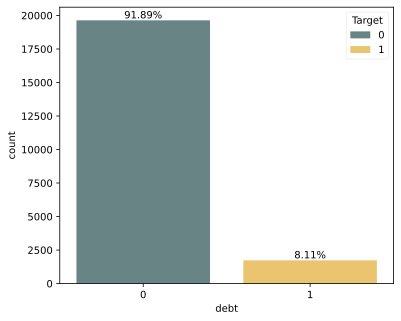

In [43]:
# Создание графика с заданным размером
plt.figure(figsize=(6, 5))

# Построение countplot для столбца 'debt'
ax = sns.countplot(data=df, x='debt', hue='debt', palette=['#638889', '#ffcc5c', '#f28585'], alpha=1)

total = float(len(df))

# Добавление процентных значений над столбцами countplot
for p in ax.patches:
    percentage = (p.get_height() / total) * 100
    if percentage > 0:
        percentage_label = '{:.2f}%'.format(percentage)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage_label, (x, y), textcoords="offset points", xytext=(0, 2), ha='center', fontsize=10)

# Добавление легенды с подписями 'Target' и установка прозрачности рамки
h, labels = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Target", framealpha=0.3, loc="upper right")

plt.show()  # Отображение графика


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #cdbea7); border: 2px solid #000; border-radius: 10px; text-align: center; font-family: avenir; width: 300px;">
    
#### **Разделим на категории признаки `dob_years` и `total_income`**

In [44]:
# Функция для оптимального биннинга числового признака с использованием OptimalBinning
def opt_bin_transform(df, x, y):
    optb = OptimalBinning(name=x, dtype='numerical', solver='cp')
    optb.fit(df[x].values, y)
    binning_table = optb.binning_table
    return optb.transform(df[x], metric="bins"), binning_table

# Применение оптимального биннинга к столбцу 'dob_years' и сохранение результатов в новом столбце 'age_categories'
df['age_categories'], binning_table_age = opt_bin_transform(df.drop(columns='debt'), 'dob_years', df['debt'].values)

In [45]:
# Функция для оптимального биннинга числового признака с использованием OptimalBinning
def reg_opt_bin_transform(df, x, y):
    optb = OptimalBinning(name=x, dtype='numerical', solver='cp', problem_type='regression')
    optb.fit(df[x].values, y)
    binning_table = optb.binning_table
    return optb.transform(df[x], metric="bins"), binning_table

# Применение оптимального биннинга к столбцу 'dob_years' и сохранение результатов в новом столбце 'age_categories'
df['days_employed_bins'], binning_table_days_employed = opt_bin_transform(df.drop(columns='debt'), 'days_employed', df['debt'].values)

In [46]:
# Функция для оптимального биннинга числового признака с использованием OptimalBinning
def reg_opt_bin_transform(df, x, y):
    optb = OptimalBinning(name=x, dtype='numerical', solver='cp', problem_type='regression')
    optb.fit(df[x].values, y)
    binning_table = optb.binning_table
    return optb.transform(df[x], metric="bins"), binning_table
    

# Применение оптимального биннинга к столбцу 'total_income' и сохранение результатов в новом столбце 'total_income_categories'
df['total_income_categories'], binning_table_income = opt_bin_transform(df.drop(columns='debt'), 'total_income', df['debt'].values)

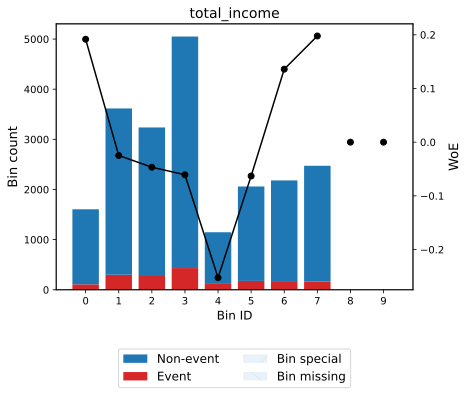

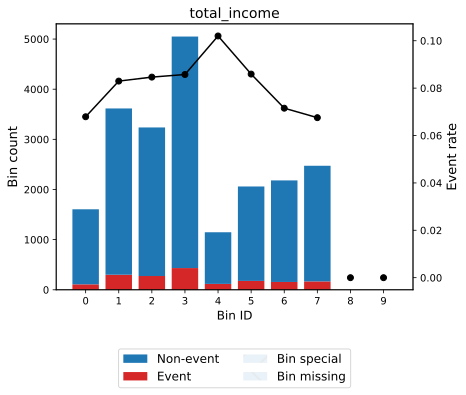

In [47]:
# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_income = binning_table_income.build()

# Визуализируем таблицу биннинга, используя метрику "WOE" (Weight of Evidence)`
binning_table_income.plot(metric="woe")

# Визуализируем таблицу биннинга, используя метрику "event_rate" (частота событий)`
binning_table_income.plot(metric="event_rate")

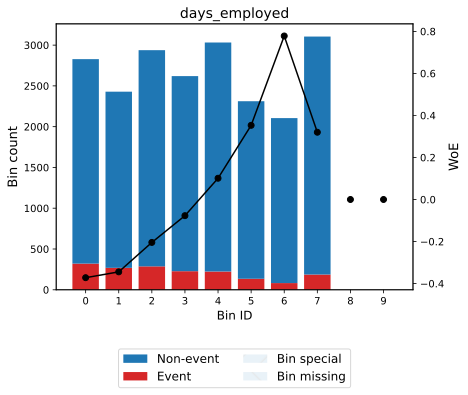

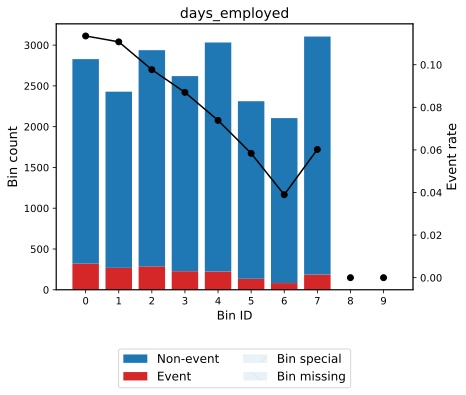

In [48]:
# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_days_employed = binning_table_days_employed.build()

# Визуализируем таблицу биннинга, используя метрику "WOE" (Weight of Evidence)`
binning_table_days_employed.plot(metric="woe")

# Визуализируем таблицу биннинга, используя метрику "event_rate" (частота событий)`
binning_table_days_employed.plot(metric="event_rate")

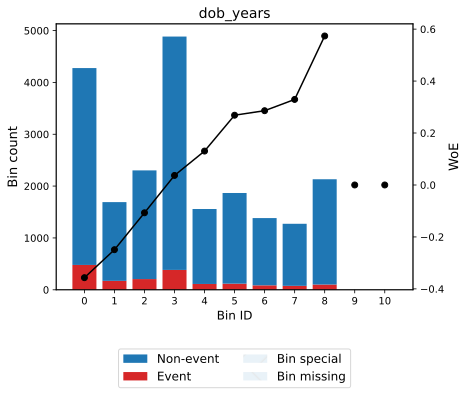

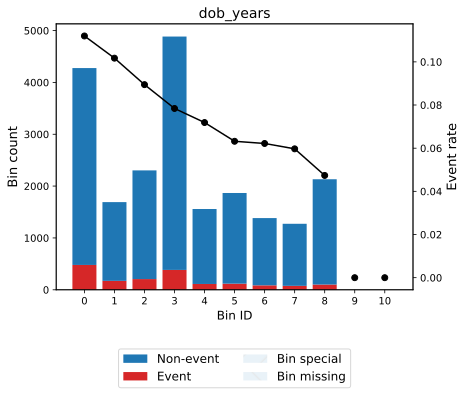

In [49]:
# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_age = binning_table_age.build()

# Визуализируем таблицу биннинга, используя метрику "WOE" (Weight of Evidence)`
binning_table_age.plot(metric="woe")

# Визуализируем таблицу биннинга, используя метрику "event_rate" (частота событий)`
binning_table_age.plot(metric="event_rate")

In [50]:
# Определяем тип таблицы биннинга`
type(binning_table_age)

# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_age = binning_table_age.build()

# Выводим оптимальное биннинг-решение`
optimal_binning_age

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 31.50)",4277,0.200150,3798,479,0.111994,-0.356981,0.029622,0.003683
1,"[31.50, 34.50)",1691,0.079133,1519,172,0.101715,-0.249198,0.005455,0.000680
2,"[34.50, 38.50)",2303,0.107773,2097,206,0.089449,-0.107124,0.001294,0.000162
3,"[38.50, 47.50)",4885,0.228602,4502,383,0.078403,0.036731,0.000304,0.000038
4,"[47.50, 50.50)",1558,0.072909,1446,112,0.071887,0.130547,0.001177,0.000147
5,"[50.50, 54.50)",1867,0.087370,1749,118,0.063203,0.268604,0.005636,0.000702
6,"[54.50, 57.50)",1383,0.064720,1297,86,0.062184,0.285951,0.004697,0.000585
7,"[57.50, 60.50)",1273,0.059572,1197,76,0.059701,0.32933,0.005633,0.000701
8,"[60.50, inf)",2132,0.099771,2031,101,0.047373,0.573652,0.025902,0.003194
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [51]:
# Определяем тип таблицы биннинга`
type(binning_table_days_employed)

# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_days_employed = binning_table_days_employed.build()

# Выводим оптимальное биннинг-решение`
optimal_binning_days_employed

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 22.50)",2828,0.132341,2507,321,0.113508,-0.37211,0.021416,0.002662
1,"[22.50, 41.09)",2429,0.113669,2160,269,0.110745,-0.344358,0.015572,0.001937
2,"[41.09, 67.57)",2938,0.137489,2651,287,0.097686,-0.204301,0.006252,0.000780
3,"[67.57, 96.09)",2620,0.122608,2392,228,0.087023,-0.076971,0.000750,0.000094
4,"[96.09, 142.09)",3032,0.141888,2808,224,0.073879,0.101071,0.001389,0.000174
5,"[142.09, 231.50)",2312,0.108194,2177,135,0.058391,0.352918,0.011635,0.001447
6,"[231.50, 14314.00)",2105,0.098507,2023,82,0.038955,0.778107,0.043347,0.005286
7,"[14314.00, inf)",3105,0.145304,2918,187,0.060225,0.320035,0.013025,0.001621
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [52]:
# Определяем тип таблицы биннинга`
type(binning_table_income)

# Строим оптимальное биннинг-решение на основе таблицы биннинга`
optimal_binning_income = binning_table_income.build()

# Выводим оптимальное биннинг-решение`
optimal_binning_income

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 71770.20)",1605,0.075109,1496,109,0.067913,0.191692,0.002548,0.000318
1,"[71770.20, 106567.24)",3616,0.169217,3316,300,0.082965,-0.024779,0.000105,0.000013
2,"[106567.24, 134641.38)",3237,0.151481,2963,274,0.084646,-0.046681,0.000337,0.000042
3,"[134641.38, 163022.48)",5050,0.236324,4617,433,0.085743,-0.060748,0.000895,0.000112
4,"[163022.48, 175300.38)",1147,0.053676,1030,117,0.102005,-0.25237,0.003800,0.000474
5,"[175300.38, 206116.72)",2060,0.096401,1883,177,0.085922,-0.063039,0.000393,0.000049
6,"[206116.72, 259213.46)",2181,0.102064,2025,156,0.071527,0.135958,0.001782,0.000223
7,"[259213.46, inf)",2473,0.115728,2306,167,0.067529,0.197765,0.004167,0.000520
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [53]:
# Выбор возрастных интервалов из DataFrame optimal_binning_age, исключая значения 'Special', 'Missing', ''
age_bins = optimal_binning_age.loc[~optimal_binning_age['Bin'].isin(['Special', 'Missing', '']), 'Bin']

# Создание словаря для отображения интервалов в целые числа
interval_to_int = dict(zip(age_bins, range(1, len(age_bins) + 1)))

# Применение отображения interval_to_int к столбцу 'age_categories' в DataFrame df
df['age_categories'] = df['age_categories'].map(interval_to_int)

# Вывод словаря interval_to_int
interval_to_int


{'(-inf, 31.50)': 1,
 '[31.50, 34.50)': 2,
 '[34.50, 38.50)': 3,
 '[38.50, 47.50)': 4,
 '[47.50, 50.50)': 5,
 '[50.50, 54.50)': 6,
 '[54.50, 57.50)': 7,
 '[57.50, 60.50)': 8,
 '[60.50, inf)': 9}

In [54]:
# Выбор возрастных интервалов из DataFrame optimal_binning_age, исключая значения 'Special', 'Missing', ''
days_employed_bins = optimal_binning_days_employed.loc[~optimal_binning_days_employed['Bin'].isin(['Special', 'Missing', '']), 'Bin']

# Создание словаря для отображения интервалов в целые числа
interval_to_days_employed = dict(zip(days_employed_bins, range(1, len(days_employed_bins) + 1)))

# Применение отображения interval_to_days_employed к столбцу 'days_employed_bins' в DataFrame df
df['days_employed_bins'] = df['days_employed_bins'].map(interval_to_days_employed)

# Вывод словаря interval_to_days_employed
interval_to_days_employed

{'(-inf, 22.50)': 1,
 '[22.50, 41.09)': 2,
 '[41.09, 67.57)': 3,
 '[67.57, 96.09)': 4,
 '[96.09, 142.09)': 5,
 '[142.09, 231.50)': 6,
 '[231.50, 14314.00)': 7,
 '[14314.00, inf)': 8}

In [55]:
# Создаем словарь маппинга
# Выбор категорий дохода из DataFrame optimal_binning_income, исключая значения 'Special', 'Missing', ''
income_bins = optimal_binning_income.loc[~optimal_binning_income['Bin'].isin(['Special', 'Missing', '']), 'Bin']

# Создание словаря для отображения интервалов дохода в категории на основе буквенного представления
interval_to_income_cat = dict(zip(income_bins, [chr(65 + idx) for idx in range(len(income_bins))]))

# Применение отображения interval_to_income_cat к столбцу 'total_income_categories' в DataFrame df
df['total_income_categories'] = df['total_income_categories'].map(interval_to_income_cat)

# Вывод словаря interval_to_income_cat
interval_to_income_cat


{'(-inf, 71770.20)': 'A',
 '[71770.20, 106567.24)': 'B',
 '[106567.24, 134641.38)': 'C',
 '[134641.38, 163022.48)': 'D',
 '[163022.48, 175300.38)': 'E',
 '[175300.38, 206116.72)': 'F',
 '[206116.72, 259213.46)': 'G',
 '[259213.46, inf)': 'H'}

<div style="padding: 10px; width: 680px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='third'></a>**Этап 3: Анализ данных и ответы на вопросы**
[**Главное меню**](#menu)



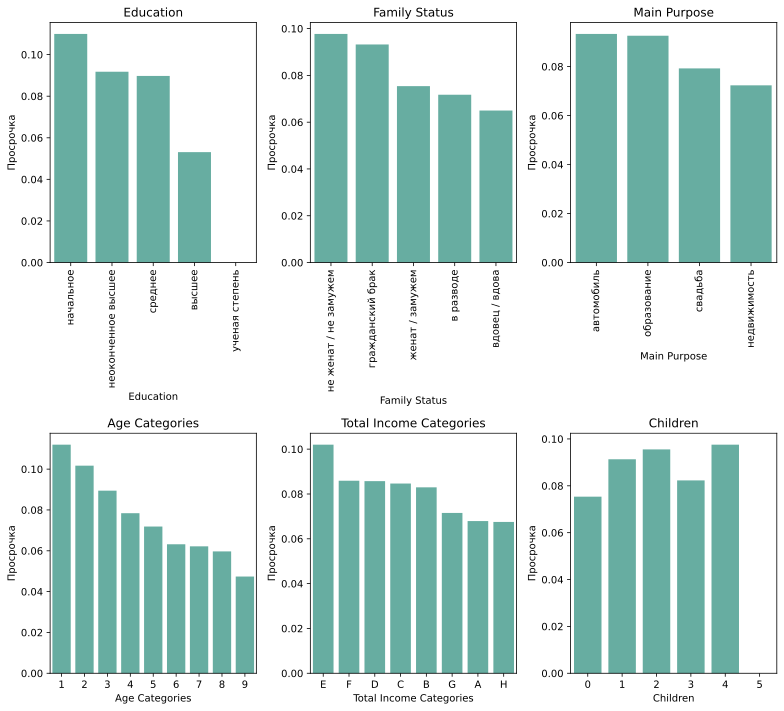

In [56]:

# Определение списка признаков для построения графиков и добавление целевого признака
PLOT_FEATURES = ['education', 'family_status', 'main_purpose', 'age_categories', 'total_income_categories', 'children']
selected_columns = PLOT_FEATURES + ['debt']

# Создание DataFrame numerics, содержащего только выбранные столбцы
numerics = df[selected_columns]

# Вычисление количества графиков, столбцов и строк для отображения
num_plots = len(PLOT_FEATURES)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

# Создание графиков с заданным размером и распределением subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(11, 5 * num_rows))

# Обработка случая, когда num_rows равно 1
if num_rows == 1:
    axes = [axes]

# Построение графиков для каждого признака из PLOT_FEATURES
for i, col in enumerate(PLOT_FEATURES):
    row, column = divmod(i, num_columns)
    ax = axes[row][column] if num_rows > 1 else axes[column]

    # Группировка данных по признаку и целевому признаку для вычисления процентного распределения
    grouped = df.groupby([col, 'debt']).size().unstack(fill_value=0)
    total_counts = df.groupby(col).size()
    percentage = grouped.div(total_counts, axis=0)

    # Подготовка данных для построения barplot
    pivot_table = percentage.reset_index()
    pivot_table_visual = pivot_table.sort_values(by=1, ascending=False)

    # Построение barplot
    sns.barplot(data=pivot_table_visual, x=col, y=1, palette=['#5bb9a9'], alpha=1, ax=ax)

    # Настройка заголовка и подписей осей
    ax.set_title(f'{" ".join(list(map(str.title, col.split("_"))))}')
    ax.set_ylabel('Просрочка')
    ax.set_xlabel(col.replace('_', ' ').title())

    # Определение угла поворота подписей по оси X
    max_xlabel_length = max([len(str(item.get_text())) for item in ax.get_xticklabels()])
    rotation_angle = 0 if max_xlabel_length < 3 else 90
    ax.tick_params(axis='x', rotation=rotation_angle)

plt.tight_layout()  # Оптимизация расположения subplot
plt.show()  # Отображение графиков



<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">


### <a id='fourth'></a> Вопрос 1:
### Есть ли зависимость между количеством детей и возвратом кредита в срок?

[**Главное меню**](#menu)



In [57]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['children', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('children').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_chld = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_chld.reset_index(drop=True)


debt,children,0,1
0,4,0.902439,0.097561
1,2,0.904447,0.095553
2,1,0.908678,0.091322
3,3,0.917683,0.082317
4,0,0.924628,0.075372
5,5,1.000000,0.000000


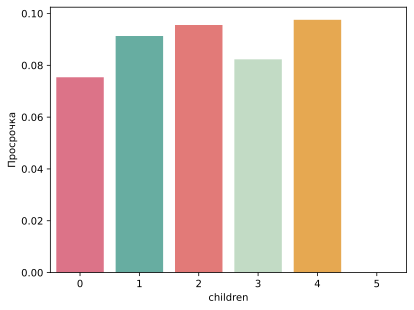

In [58]:
# Построение barplot на основе данных из DataFrame pivot_table_chld
sns.barplot(data=pivot_table_chld, x='children', y=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси Y
plt.ylabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
Анализируя предоставленные данные, можно сделать выводы о зависимости между количеством детей и возвратом кредита в срок. В таблице представлено распределение заемщиков по количеству детей и вероятность возврата кредита (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Children | Return (%) | Not Return (%) |
|------|----------|------------|---------------|
| 0    | 4        | 0.902439   | 0.097561      |
| 1    | 2        | 0.904447   | 0.095553      |
| 2    | 1        | 0.908678   | 0.091322      |
| 3    | 3        | 0.917683   | 0.082317      |
| 4    | 0        | 0.924628   | 0.075372      |
| 5    | 5        | 1.000000   | 0.000000      |

### Выводы:
1. **Общая тенденция**: В целом, с увеличением количества детей, вероятность возврата кредита в срок (Return (%)) несколько уменьшается, хотя это изменение незначительно.
   
2. **Особые случаи**:
   - **5 детей**: Исключительный случай, когда все заемщики с 5 детьми вернули кредит (100% возврата, 0% не возврата). Это может быть выбросом или аномалией из-за малого размера выборки.
   - **Без детей**: Заемщики без детей имеют самую высокую вероятность возврата кредита (92.46%).

3. **Наибольшая вероятность невозврата**:
   - Заемщики с 4 детьми имеют наибольшую вероятность невозврата кредита (9.76%), что немного выше по сравнению с другими категориями.

### Заключение:
Можно сделать осторожный вывод, что наличие большего количества детей может незначительно увеличивать вероятность невозврата кредита, за исключением случая с 5 детьми, где все заемщики вернули кредит. Однако для более точного анализа необходима дополнительная информация о размере выборок и других возможных факторах, влияющих на возврат кредита.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">


### <a id='fifth'></a>Вопрос 2:

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

[**Главное меню**](#menu)

In [59]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['family_status', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('family_status').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_family_status = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_family_status.reset_index(drop=True)


debt,family_status,0,1
0,не женат / не замужем,0.902291,0.097709
1,гражданский брак,0.906786,0.093214
2,женат / замужем,0.924603,0.075397
3,в разводе,0.928270,0.071730
4,вдовец / вдова,0.935010,0.064990


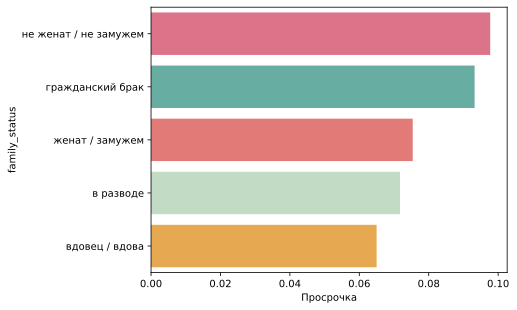

In [60]:
# Построение barplot на основе данных из DataFrame pivot_table_family_status
sns.barplot(data=pivot_table_family_status, y='family_status', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">


Анализируя предоставленные данные, можно сделать выводы о зависимости между количеством детей и возвратом кредита в срок. В таблице представлено распределение заемщиков по количеству детей и процент возврата и невозврата кредита для различных категорий количества детей. (0 - возврат, 1 - не возврат).


Таблица:

| Debt | Family Status             | Return (%) | Not Return (%) |
|------|---------------------------|------------|----------------|
| 0    | не женат / не замужем     | 90.2291    | 9.7709         |
| 1    | гражданский брак          | 90.6786    | 9.3214         |
| 2    | женат / замужем           | 92.4603    | 7.5397         |
| 3    | в разводе                 | 92.8270    | 7.1730         |
| 4    | вдовец / вдова            | 93.5010    | 6.4990         |

### Выводы:
1. **Общая тенденция**: Процент возврата кредита выше у тех, кто состоит в браке (официальном или гражданском), а также у вдовцов и разведенных, по сравнению с неженатыми/незамужними.

2. **Наибольший процент возврата кредита**:
   - Вдовцы/вдовы имеют самый высокий процент возврата кредита (93.50%).

3. **Наибольший процент невозврата кредита**:
   - Неженатые/незамужние заемщики имеют самый высокий процент невозврата кредита (9.77%).

4. **Гражданский брак и официально женатые**:
   - Заемщики в гражданском браке и официально женатые/замужние имеют сравнительно высокие проценты возврата кредита: 90.68% и 92.46% соответственно.

### Заключение:
Семейное положение оказывает значительное влияние на возврат кредита. Вдовцы и вдовы, а также люди, состоящие в браке (официальном или гражданском), и разведенные имеют более высокие проценты возврата кредита по сравнению с неженатыми/незамужними заемщиками. Наибольший риск невозврата кредита наблюдается у неженатых/незамужних заемщиков.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='sixth'></a>Вопрос 3:

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

[**Главное меню**](#menu)

In [61]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['total_income_categories', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('total_income_categories').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_income = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
income_cats_pivot = pivot_table_income.reset_index(drop=True)


In [62]:
income_cats_pivot

debt,total_income_categories,0,1
0,E,0.897995,0.102005
1,F,0.914078,0.085922
2,D,0.914257,0.085743
3,C,0.915354,0.084646
4,B,0.917035,0.082965
5,G,0.928473,0.071527
6,A,0.932087,0.067913
7,H,0.932471,0.067529


In [63]:
def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None


In [64]:
# Применение функции get_key_from_value к столбцу 'total_income_categories' для получения соответствующих ключей
income_cats_pivot['mapping'] = income_cats_pivot['total_income_categories'].apply(lambda x: get_key_from_value(interval_to_income_cat, x))

# Вычисление количества значений 'total_income_categories' и сохранение в новый столбец 'counts'
income_cats_quantity = df.groupby('total_income_categories')['total_income_categories'].count()
income_cats_pivot['counts'] = income_cats_pivot['total_income_categories'].map(income_cats_quantity)

# Вывод DataFrame income_cats_pivot с добавленными столбцами 'mapping' и 'counts'
income_cats_pivot


debt,total_income_categories,0,1,mapping,counts
0,E,0.897995,0.102005,"[163022.48, 175300.38)",1147
1,F,0.914078,0.085922,"[175300.38, 206116.72)",2060
2,D,0.914257,0.085743,"[134641.38, 163022.48)",5050
3,C,0.915354,0.084646,"[106567.24, 134641.38)",3237
4,B,0.917035,0.082965,"[71770.20, 106567.24)",3616
5,G,0.928473,0.071527,"[206116.72, 259213.46)",2181
6,A,0.932087,0.067913,"(-inf, 71770.20)",1605
7,H,0.932471,0.067529,"[259213.46, inf)",2473


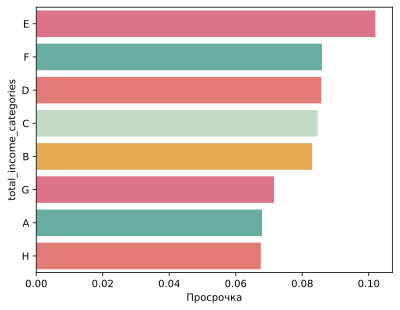

In [65]:
# Построение barplot на основе данных из DataFrame pivot_table_income
sns.barplot(data=pivot_table_income, y='total_income_categories', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">

Проанализировав данные, можно сделать выводы о зависимости между количеством уровнем дохода и возвратом кредита в срок. В таблице представлено распределение заемщиков по уровню дохода и процент возврата и невозврата кредита для различных категорий заемщиков. (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Total Income Category | Return (%) | Not Return (%) | Income Interval Description                  |
|------|-----------------------|------------|----------------|---------------------------------------------|
| 0    | A                     | 0.932087   | 0.067913       | от 0 до 71770.20                            |
| 1    | B                     | 0.917035   | 0.082965       | от 71770.20 до 106567.24                    |
| 2    | C                     | 0.915354   | 0.084646       | от 106567.24 до 134641.38                   |
| 3    | D                     | 0.914257   | 0.085743       | от 134641.38 до 163022.48                   |
| 4    | E                     | 0.897995   | 0.102005       | от 163022.48 до 175300.38                   |
| 5    | F                     | 0.914078   | 0.085922       | от 175300.38 до 206116.72                   |
| 6    | G                     | 0.928473   | 0.071527       | от 206116.72 до 259213.46                   |
| 7    | H                     | 0.932471   | 0.067529       | от 259213.46 и выше                         |

### Выводы:
1. **Общая тенденция**: С увеличением уровня дохода заемщиков растет вероятность возврата кредита в срок.

2. **Наибольшая вероятность возврата кредита**:
   - Заемщики с наименьшим уровнем дохода (категория A) демонстрируют высокий процент возврата кредита (93.21%), что является вторым по величине после заемщиков с наивысшим доходом (категория H) .

3. **Наибольший процент невозврата кредита**:
   - Наихудший процент возврата кредита наблюдается у заемщиков с категорией дохода E (10.20%) и F (8.59%).

4. **Промежуточные категории дохода** (категории B, C, D, G):
   - Уровень возврата кредита варьируется от 89.80% до 93.25%. В этой группе заемщики с наивысшим доходом (категория H) также показывают высокий процент возврата (93.25%), что подтверждает, что более высокий доход связан с меньшим риском невозврата кредита.

### Заключение:
Исходя из предоставленных данных, можно подтвердить, что общая тенденция действительно подтверждает, что с увеличением уровня дохода заемщиков растет вероятность возврата кредита в срок. Заемщики с наименьшим доходом (категория A) и с наивысшим доходом (категория H) демонстрируют самые высокие проценты возврата кредита, в то время как промежуточные категории дохода (категории B, C, D, G) имеют разнообразные показатели, однако в целом также подтверждают положительную корреляцию между доходом и возвратом кредита.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='seventh'></a>Вопрос 4:

### Как разные цели кредита влияют на его возврат в срок?

[**Главное меню**](#menu)

In [66]:
# Группировка данных по `children` и `debt`
grouped = df.groupby(['main_purpose', 'debt']).size().unstack(fill_value=0)

# Расчет доли каждой категории
total_counts = df.groupby('main_purpose').size()
percentage = grouped.div(total_counts, axis=0)

# Преобразование результата в сводную таблицу
pivot_table = percentage.reset_index()

# Сортировка DataFrame pivot_table по столбцу с индексом 1 (просрочка) в порядке убывания
pivot_table_purpose = pivot_table.sort_values(by=1, ascending=False)

# Сброс индексов и возврат DataFrame
pivot_table_purpose.reset_index(drop=True)


debt,main_purpose,0,1
0,автомобиль,0.906673,0.093327
1,образование,0.907407,0.092593
2,свадьба,0.920724,0.079276
3,недвижимость,0.927643,0.072357


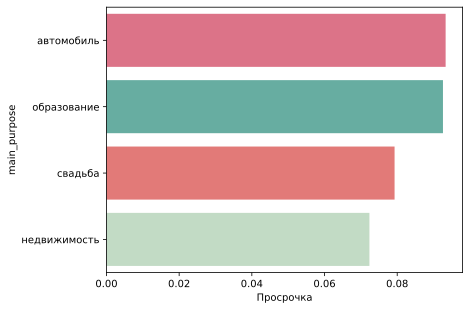

In [67]:
# Построение barplot на основе данных из DataFrame pivot_table_purpose
sns.barplot(data=pivot_table_purpose, y='main_purpose', x=1, palette=['#ed627e', '#5bb9a9', '#f46966', '#bedfc2', '#ffac38'])

# Установка подписи оси X
plt.xlabel('Просрочка')

# Отображение графика
plt.show()


<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">

Проанализировав данные, можно сделать выводы о зависимости между целью, н которую берут займ и возвратом кредита в срок. В таблице представлено распределение заемщиков по цели займов и процент возврата и невозврата кредита для различных категорий заемщиков. (0 - возврат, 1 - не возврат).

Таблица:

| Debt | Main Purpose  | Return (%) | Not Return (%) |
|------|---------------|------------|----------------|
| 0    | автомобиль    | 90.6673    | 9.3327         |
| 1    | образование   | 90.7407    | 9.2593         |
| 2    | свадьба       | 92.0724    | 7.9276         |
| 3    | недвижимость  | 92.7643    | 7.2357         |

### Выводы:
1. **Общая тенденция**: Заемщики, которые берут кредит на свадьбу или недвижимость, имеют более высокий процент возврата кредита в срок по сравнению с теми, кто берет кредит на автомобиль или образование.

2. **Наибольший процент возврата кредита**:
   - Наибольший процент возврата кредита наблюдается у заемщиков, цель которых свадьба (92.07%) и недвижимость (92.76%).

3. **Наибольший процент невозврата кредита**:
   - Наибольший процент невозврата кредита у заемщиков, берущих кредит на автомобиль (9.33%) и образование (9.26%).

### Заключение:
Цель кредита влияет на вероятность возврата кредита в срок. Заемщики, берущие кредит на свадьбу или недвижимость, более склонны возвращать кредит в срок. В то время как кредиты на автомобиль и образование могут иметь немного больший риск невозврата.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='eighth'></a>Вопрос 5:
### Балансировка классов.
### Как она влияет на производительность модели?


[**Главное меню**](#menu)

### Генерация новых признаков

In [68]:
# List of aggregation functions to apply 
funcs = [np.sum, np.mean, np.std, np.max, np.min, np.median, np.size] 

# Dictionary specifying aggregation functions for each column 
agg_funcs = {'days_employed': funcs,
			 'total_income': funcs} 

# Perform aggregation on 'transactions' DataFrame grouped by 'customer_id' using agg_funcs 
result = df.groupby('dob_years').agg(agg_funcs) 

# Flatten the multi-index columns to make them more readable 
result.columns = ['_'.join(col).strip() for col in result.columns.values] 

# Reset the index to convert 'customer_id' back to a regular column 
result = result.reset_index() 

result.fillna(0, inplace=True)

# Merge the 'transactions' DataFrame with the aggregated 'result' DataFrame on 'customer_id' using a left join 
df = pd.merge(df, result, on='dob_years', how='left') 

In [69]:
# Функция для расчета энтропии
def calculate_entropy(column):
    _, counts = np.unique(column, return_counts=True)
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Группировка по признаку "days_employed" и расчет энтропии для целевой переменной в каждой группе
entropy_by_years_employed = df.groupby(['days_employed'])['debt'].apply(calculate_entropy).reset_index()

entropy_by_years_employed.fillna(0, inplace=True)

entropy_by_years_employed.columns = ['days_employed', 'entropy']

# Присоединение энтропии к исходным данным
df = pd.merge(df, entropy_by_years_employed, on='days_employed', how='left')

In [70]:
# Определение списка функций агрегации
funcs = [np.sum, np.mean, np.std, np.max, np.min, np.median, np.size]

# Создание словаря с функциями агрегации для каждого столбца
agg_funcs = {'days_employed': funcs,
        'children': funcs,
        'total_income': funcs}

# Создание списка имен столбцов для агрегированных данных
cols = ['_agg_'.join(col).strip() for col in df.groupby('days_employed').agg(agg_funcs).columns.values]

# Выполнение агрегации данных по столбцу 'days_employed'
agg_data = df.groupby('days_employed').agg(agg_funcs)

# Присвоение новых имен столбцам агрегированных данных
agg_data.columns = cols

# Сброс индекса агрегированных данных
agg_data = agg_data.reset_index() 

# Заполнение пропущенных значений нулями
agg_data.fillna(0, inplace=True)

# Объединение исходного DataFrame с агрегированными данными по столбцу 'days_employed'
df = pd.merge(df, agg_data, on='days_employed', how='left')

In [71]:
# Создание списка признаков для обучения, исключая указанные столбцы, и определение целевой переменной
train_features = df.drop(columns=['education_id', 'family_status_id', 'debt', 'purpose', 'lemmas']).columns.tolist()
target = 'debt'

In [72]:
# Подсчет количества значений в столбце 'target'
df[target].value_counts()

debt
0    19636
1     1733
Name: count, dtype: int64

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
## Решение проблемы несбалансированности данных

### Описание проблемы

В наборе данных присутствует несбалансированность классов, что означает неравномерное представление классов. Это может привести к созданию модели с предвзятостью, которая будет плохо работать с новыми данными.

### Методы решения

Существует два основных подхода к решению проблемы несбалансированности:

1. **Undersampling**: уменьшение количества примеров преобладающего класса до уровня меньшинства.
2. **Oversampling**: увеличение количества примеров меньшинства путем дублирования или создания синтетических данных.

### Выбранное решение: Оба подхода

В данном исследовании мы опробуем оба подхода: undersampling и oversampling, чтобы сравнить их эффективность для нашей конкретной задачи.

#### Undersampling

##### Преимущества:
- Простота реализации
- Уменьшение времени обучения модели
- Снижение вычислительных затрат

##### Недостатки:
- Потеря потенциально важной информации из преобладающего класса
- Уменьшение размера датасета, что может привести к недообучению модели
- Возможное искажение распределения данных

#### Oversampling

##### Преимущества:
- Сохранение всей исходной информации
- Увеличение размера датасета, что может улучшить обучение модели
- Возможность создания синтетических примеров, потенциально улучшающих обобщающую способность модели

##### Недостатки:
- Риск переобучения модели на дублированных или синтетических данных
- Увеличение времени обучения и вычислительных затрат
- Возможное искусственное усиление шума в данных

### Заключение

Использование обоих подходов позволит нам сравнить их эффективность и выбрать наиболее подходящий метод для нашей конкретной задачи. Мы сможем оценить, как каждый метод влияет на производительность модели, время обучения и качество предсказаний. Это поможет нам принять обоснованное решение о том, какой подход лучше использовать для решения проблемы несбалансированности в нашем наборе данных.



In [73]:
# Создание закодированных данных X_encoded и y из исходного DataFrame df
X_encoded = pd.get_dummies(df[train_features])
y = df[target]

In [74]:
# Получение списка столбцов, исключая 'flood_probability'
cols = X_encoded.select_dtypes(include=np.number).columns.tolist()

# Определение статистических функций для применения
funcs = [np.sum, np.mean, np.std, np.max, np.min, np.median]

# Применение каждой статистической функции к каждой строке в DataFrame
for func in funcs:
    X_encoded[f'feature_{func.__name__}'] = X_encoded[cols].agg(func, axis=1)

### Снижение рзмерности данных

In [75]:
# Присваивание закодированных признаков переменной X и целевой переменной y
X = X_encoded
y = df[target] 

# Вычисление информационной энтропии для каждого признака
info_gains = mutual_info_classif(X, y)

# Инициализация списка для хранения отобранных признаков
selected_features = []

# Вывод информационных выигрышей и отбор признаков с положительным выигрышем
for col, gain in zip(X_encoded.columns, info_gains):
    if float(round(gain, 4)) > 0:
        selected_features.append(col)

# Вывод количества отобранных признаков
print(f'Количество отобранных признаков: {len(selected_features)}')

Количество отобранных признаков: 67


In [76]:
# Разделяем сбалансироваанные данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.3, random_state=42)

### Балансироовка классов

#### #1 Undersample

In [77]:
# Вывод распределения классов в целевой переменной до применения undersampling
print("Before undersampling: ", Counter(y))

# Создание объекта RandomUnderSampler для выполнения undersampling
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=40)

# Применение undersampling к обучающим данным
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

# Вывод распределения классов в целевой переменной после применения undersampling
print("After undersampling: ", Counter(y_resampled))

Before undersampling:  Counter({0: 19636, 1: 1733})
After undersampling:  Counter({0: 1245, 1: 1245})


#### #2 Oversample

In [78]:
# Вывод распределения классов в целевой переменной до применения oversampling
print("Before undersampling: ", Counter(y))


minority_index = X_train[y_train == 1].index.tolist()
majority_index = X_train[y_train == 0].index.tolist()

majority = pd.concat([X_train.loc[majority_index], y_train[majority_index]], axis=1)
minority = pd.concat([X_train.loc[minority_index], y_train[minority_index]], axis=1) 

# Oversampling the minority class to balance the dataset
minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Concatenating the majority class with the oversampled minority class to create a balanced dataset
oversampled_data = pd.concat([majority, minority_oversampled])

oversampled_data = oversampled_data.sample(frac=1).reset_index(drop=True)

X_oversampled = oversampled_data.drop(columns='debt')
y_oversampled = oversampled_data['debt']

# Вывод распределения классов в целевой переменной после применения oversampling
print("After undersampling: ", Counter(y_oversampled))

Before undersampling:  Counter({0: 19636, 1: 1733})
After undersampling:  Counter({1: 13713, 0: 13713})


### Сравнение производительности моделей на сбалансированных и несбалансированных данных

In [79]:
# Определение ANSI escape кодов для красного цвета и сброса цвета
RED = '\033[91m'
RESET = '\033[0m'

# Создание и обучение моделей на несбалансированных и сбалансированных данных
imb_model = DecisionTreeClassifier(random_state=42)
bal_model = DecisionTreeClassifier(random_state=42)
imb_model.fit(X_train, y_train)
bal_model.fit(X_resampled, y_resampled)

# Предсказания на тестовом наборе
imb_pred = imb_model.predict(X_test)
bal_pred = bal_model.predict(X_test)

# Функция для вычисления TPR (True Positive Rate) и FPR (False Positive Rate)
def calculate_tpr_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn) if tp > 0 and fn > 0 else 0.00001
    fpr = fp / (fp + tn) if tp > 0 and fn > 0 else 0.00001
    return tpr, fpr

# Вычисление метрик для обеих моделей
imb_accuracy = accuracy_score(y_test, imb_pred)
bal_accuracy = accuracy_score(y_test, bal_pred)
imb_f1 = f1_score(y_test, imb_pred)
bal_f1 = f1_score(y_test, bal_pred)
imb_tpr, imb_fpr = calculate_tpr_fpr(y_test, imb_pred)
bal_tpr, bal_fpr = calculate_tpr_fpr(y_test, bal_pred)
imb_auc = roc_auc_score(y_test, imb_model.predict_proba(X_test)[:, 1])
bal_auc = roc_auc_score(y_test, bal_model.predict_proba(X_test)[:, 1])

# Вычисление улучшения в процентах для каждой метрики
accuracy_improvement = (bal_accuracy - imb_accuracy) / imb_accuracy * 100
f1_improvement = (bal_f1 - imb_f1) / imb_f1 * 100
tpr_improvement = (bal_tpr - imb_tpr) / imb_tpr * 100
fpr_improvement = (imb_fpr - bal_fpr) / imb_fpr * 100  # Для FPR меньше значит лучше
auc_improvement = (bal_auc - imb_auc) / imb_auc * 100

# Создание строки для вывода
comparison = f"""
Сравнение моделей на сбалансированных и несбалансированных данных
| Метрика   | Несбалансированные | Сбалансированные | Улучшение |
|-----------|--------------------|------------------|-----------|
| Точность  | {imb_accuracy:.4f}             | {bal_accuracy:.4f}           | {accuracy_improvement:.2f}%   |
| F1-мера   | {imb_f1:.4f}             | {bal_f1:.4f}           | {f1_improvement:.2f}%     |
| TPR       | {imb_tpr:.4f}             | {bal_tpr:.4f}           | {tpr_improvement:.2f}%   |
| FPR       | {imb_fpr:.4f}             | {bal_fpr:.4f}           | {fpr_improvement:.2f}%  |
| AUC-ROC   | {imb_auc:.4f}             | {bal_auc:.4f}           | {auc_improvement:.2f}%     |

Выводы:
1. Модель на несбалансированных данных показала точность {imb_accuracy:.4f}, F1-меру {imb_f1:.4f}, TPR {imb_tpr:.4f}, FPR {imb_fpr:.4f} и AUC-ROC {imb_auc:.4f}.
2. Модель на сбалансированных данных достигла точности {bal_accuracy:.4f}, F1-меры {bal_f1:.4f}, TPR {bal_tpr:.4f}, FPR {bal_fpr:.4f} и AUC-ROC {bal_auc:.4f}.
3. Балансировка данных привела к:
   - {'Увеличению' if accuracy_improvement > 0 else 'Уменьшению'} точности на {abs(accuracy_improvement):.2f}%.
   - {'Увеличению' if f1_improvement > 0 else 'Уменьшению'} F1-меры на {abs(f1_improvement):.2f}%.
   - {'Увеличению' if tpr_improvement > 0 else 'Уменьшению'} TPR на {abs(tpr_improvement):.2f}%.
   - {'Уменьшению' if fpr_improvement > 0 else 'Увеличению'} FPR на {abs(fpr_improvement):.2f}%.
   - {'Увеличению' if auc_improvement > 0 else 'Уменьшению'} AUC-ROC на {abs(auc_improvement):.2f}%.

{'Таким образом,' if tpr_improvement > 0 or fpr_improvement > 0 and auc_improvement > 0 and f1_improvement > 0 else 'В данном случае,'} 
балансировка данных {'позволила' if tpr_improvement > 0 or fpr_improvement > 0 and auc_improvement > 0 and f1_improvement > 0
else 'не позволила'} значительно улучшить качество модели и ее способность разделять классы.
"""

# Вывод сравнения красным цветом
print(f"{RED}{comparison}{RESET}")


Сравнение моделей на сбалансированных и несбалансированных данных
| Метрика   | Несбалансированные | Сбалансированные | Улучшение |
|-----------|--------------------|------------------|-----------|
| Точность  | 0.8549             | 0.6071           | -28.99%   |
| F1-мера   | 0.1637             | 0.1898           | 15.95%     |
| TPR       | 0.1865             | 0.6045           | 224.18%   |
| FPR       | 0.0900             | 0.3927           | -336.40%  |
| AUC-ROC   | 0.5482             | 0.6059           | 10.52%     |

Выводы:
1. Модель на несбалансированных данных показала точность 0.8549, F1-меру 0.1637, TPR 0.1865, FPR 0.0900 и AUC-ROC 0.5482.
2. Модель на сбалансированных данных достигла точности 0.6071, F1-меры 0.1898, TPR 0.6045, FPR 0.3927 и AUC-ROC 0.6059.
3. Балансировка данных привела к:
   - Уменьшению точности на 28.99%.
   - Увеличению F1-меры на 15.95%.
   - Увеличению TPR на 224.18%.
   - Увеличению FPR на 336.40%.
   - Увеличению AUC-ROC на 10.52%.

Таким образом

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='nineth'></a>Вопрос 6:
### Алгоритмы машинного обучения.
### Какой алгоритм лучше всего подходит для предсказания вероятности возврата кредита в срок?



[**Главное меню**](#menu)

### Выбор Алгоритма Классификации

In [80]:
# Определение параметров для LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
}

# Определение словаря моделей с их параметрами
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    # "SCV": SVC(gamma='auto'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='binary:logistic', random_state=42), 
    "CatBoost": CatBoostClassifier(loss_function='Logloss', random_state=42, verbose=0, iterations=600, learning_rate=0.1, max_depth=5),
    "LightGBM": LGBMClassifier(**params, random_state=42, verbosity=-1)
}

# Инициализация переменных для хранения лучшей модели и метрик
best_roc = None
best_model = None
best_accuracy = float('-inf')
best_f1 = float('-inf')

# Цикл обучения моделей и выбора лучшей модели по метрике F1
for name, model in models.items():
    if name != 'SCV':
        # Обучение модели на ресемплированных данных
        model.fit(X_resampled, y_resampled)
        # Прогнозирование на тестовых данных
        y_pred = model.predict(X_test)
        
        # Получение вероятностей класса 1 для ROC AUC
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Вычисление ROC AUC
        roc_auc_value = roc_auc_score(y_test, y_pred_proba)
        
        # Вычисление точности
        accuracy = accuracy_score(y_test, y_pred)
        # Вычисление F1-меры
        f1 = f1_score(y_test, y_pred)
        
        # Обновление лучшей модели, если текущая F1-мера лучше предыдущей
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_roc = roc_auc_value
        
        # Вывод результатов для текущей модели
        print(f"Model: {name}")
        print("Accuracy:", accuracy)
        print("F1:", f1)
        print("Area under the ROC curve:", roc_auc_value)
        print("=" * 40)
    else:
        # Особая обработка для SVC (закомментировано)
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        if f1 > best_f1:
            best_f1 = f1
            best_model = model
        
        print(f"Model: {name}")
        print("Accuracy:", accuracy)
        print("F1:", f1)
        print("=" * 40)

# Вывод лучшей модели и ее метрик
print("Best Model:", type(best_model).__name__)
print("Accuracy:", accuracy)
print("Best F1:", best_f1)
print("Area under the ROC curve:", best_roc)

Model: Logistic Regression
Accuracy: 0.5245671502105755
F1: 0.16493150684931507
Area under the ROC curve: 0.5829186306230505
Model: Decision Tree
Accuracy: 0.6070815785368897
F1: 0.1897716307494371
Area under the ROC curve: 0.6059008989684559
Model: Random Forest
Accuracy: 0.624083606301669
F1: 0.20775805391190005
Area under the ROC curve: 0.6958216164825645
Model: Gradient Boosting
Accuracy: 0.613944782405241
F1: 0.21602787456445996
Area under the ROC curve: 0.7211281113082371
Model: XGBClassifier
Accuracy: 0.6119170176259554
F1: 0.19220779220779222
Area under the ROC curve: 0.6825419038867655
Model: CatBoost
Accuracy: 0.6122289814381532
F1: 0.1990979381443299
Area under the ROC curve: 0.6915338372501749
Model: LightGBM
Accuracy: 0.6206520043674933
F1: 0.20470896010464357
Area under the ROC curve: 0.701096448133561
Best Model: GradientBoostingClassifier
Accuracy: 0.6206520043674933
Best F1: 0.21602787456445996
Area under the ROC curve: 0.7211281113082371


### Сравнение производительности алгоритма на сбалансированных / несбалансированных данных

In [81]:
imb_model = GradientBoostingClassifier(random_state=42)
bal_model = GradientBoostingClassifier(random_state=42)
over_model = GradientBoostingClassifier(random_state=42)

imb_model.fit(X_train, y_train)
bal_model.fit(X_resampled, y_resampled)
over_model.fit(X_oversampled, y_oversampled)

imb_pred = imb_model.predict(X_test)
bal_pred = bal_model.predict(X_test)
over_pred = over_model.predict(X_test)


# Определение ANSI escape кодов для красного цвета и сброса цвета
RED = '\033[91m'
RESET = '\033[0m'

# Функция для вычисления TPR (True Positive Rate) и FPR (False Positive Rate)
def calculate_tpr_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn) if tp > 0 and fn > 0 else 0.00001
    fpr = fp / (fp + tn) if tp > 0 and fn > 0 else 0.00001
    return tpr, fpr

# Вычисление метрик для всех трех моделей
imb_accuracy = accuracy_score(y_test, imb_pred)
bal_accuracy = accuracy_score(y_test, bal_pred)
over_accuracy = accuracy_score(y_test, over_pred)

imb_f1 = f1_score(y_test, imb_pred)
bal_f1 = f1_score(y_test, bal_pred)
over_f1 = f1_score(y_test, over_pred)

imb_tpr, imb_fpr = calculate_tpr_fpr(y_test, imb_pred)
bal_tpr, bal_fpr = calculate_tpr_fpr(y_test, bal_pred)
over_tpr, over_fpr = calculate_tpr_fpr(y_test, over_pred)

imb_auc = roc_auc_score(y_test, imb_model.predict_proba(X_test)[:, 1])
bal_auc = roc_auc_score(y_test, bal_model.predict_proba(X_test)[:, 1])
over_auc = roc_auc_score(y_test, over_model.predict_proba(X_test)[:, 1])

# Функция для вычисления улучшения
def calculate_improvement(base, new):
    return (new - base) / base * 100

# Вычисление улучшения в процентах для каждой метрики
bal_accuracy_imp = calculate_improvement(imb_accuracy, bal_accuracy)
over_accuracy_imp = calculate_improvement(imb_accuracy, over_accuracy)

bal_f1_imp = calculate_improvement(imb_f1, bal_f1)
over_f1_imp = calculate_improvement(imb_f1, over_f1)

bal_tpr_imp = calculate_improvement(imb_tpr, bal_tpr)
over_tpr_imp = calculate_improvement(imb_tpr, over_tpr)

bal_fpr_imp = calculate_improvement(imb_fpr, bal_fpr)
over_fpr_imp = calculate_improvement(imb_fpr, over_fpr)

bal_auc_imp = calculate_improvement(imb_auc, bal_auc)
over_auc_imp = calculate_improvement(imb_auc, over_auc)

col1, col2, col3, col4, col5, col6 = ['Метрика', 'Несбалансированные', 'Undersampled', 'Улучшение', 'Oversampled', 'Улучшение']


col2_space_acc = ' ' * (len(col2) - len(f'{imb_accuracy:.4f}') + 1)
col2_space_f1 = ' ' * (len(col2) - len(f'{imb_f1:.4f}') + 1)
col2_space_tpr = ' ' * (len(col2) - len(f'{imb_tpr:.4f}') + 1)
col2_space_fpr = ' ' * (len(col2) - len(f'{imb_fpr:.4f}') + 1)
col2_space_auc = ' ' * (len(col2) - len(f'{imb_auc:.4f}') + 1)

col3_space_acc = ' ' * (len(col3) - len(f'{bal_accuracy:.4f}') + 1)
col3_space_f1 = ' ' * (len(col3) - len(f'{bal_f1:.4f}') + 1)
col3_space_tpr = ' ' * (len(col3) - len(f'{bal_tpr:.4f}') + 1)
col3_space_fpr = ' ' * (len(col3) - len(f'{bal_fpr:.4f}') + 1)
col3_space_auc = ' ' * (len(col3) - len(f'{bal_auc:.4f}') + 1)

col4_space_acc = ' ' * (len(col4) - len(f'{bal_accuracy_imp:.4f}') + 2)
col4_space_f1 = ' ' * (len(col4) - len(f'{bal_f1_imp:.4f}') + 2)
col4_space_tpr = ' ' * (len(col4) - len(f'{bal_tpr_imp:.4f}') + 2)
col4_space_fpr = ' ' * (len(col4) - len(f'{bal_fpr_imp:.4f}') + 2)
col4_space_auc = ' ' * (len(col4) - len(f'{bal_auc_imp:.4f}') + 2)

col5_space_acc = ' ' * (len(col5) - len(f'{over_accuracy:.4f}') + 1)
col5_space_f1 = ' ' * (len(col5) - len(f'{over_f1:.4f}') + 1)
col5_space_tpr = ' ' * (len(col5) - len(f'{over_tpr:.4f}') + 1)
col5_space_fpr = ' ' * (len(col5) - len(f'{over_fpr:.4f}') + 1)
col5_space_auc = ' ' * (len(col5) - len(f'{over_auc:.4f}') + 1)

col6_space_acc = ' ' * (len(col6) - len(f'{over_accuracy_imp:.4f}') + 2)
col6_space_f1 = ' ' * (len(col6) - len(f'{over_f1_imp:.4f}') + 2)
col6_space_tpr = ' ' * (len(col6) - len(f'{over_tpr_imp:.4f}') + 2)
col6_space_fpr = ' ' * (len(col6) - len(f'{over_fpr_imp:.4f}') + 2)
col6_space_auc = ' ' * (len(col6) - len(f'{over_auc_imp:.4f}') + 2)


# Создание строки для вывода
comparison = f"""
Сравнение GradientBoostingClassifier на несбалансированных, сбалансированных и oversampled данных
| {col1}   | {col2} | {col3} | {col4} | {col5} | {col6} |
|-----------|--------------------|--------------|-----------|-------------|-----------|
| Точность  | {imb_accuracy:.4f}{col2_space_acc}| {bal_accuracy:.4f}{col3_space_acc}| {bal_accuracy_imp:.2f}%{col4_space_acc}| {over_accuracy:.4f}{col5_space_acc}| {over_accuracy_imp:.2f}%{col6_space_acc}|
| F1-мера   | {imb_f1:.4f}{col2_space_f1}| {bal_f1:.4f}{col3_space_f1}| {bal_f1_imp:.2f}%{col4_space_f1}| {over_f1:.4f}{col5_space_f1}| {over_f1_imp:.2f}%{col6_space_f1}|
| TPR       | {imb_tpr:.4f}{col2_space_tpr}| {bal_tpr:.4f}{col3_space_tpr}| {bal_tpr_imp:.2f}%{col4_space_tpr}| {over_tpr:.4f}{col5_space_tpr}| {over_tpr_imp:.2f}%{col6_space_tpr}|
| FPR       | {imb_fpr:.4f}{col2_space_fpr}| {bal_fpr:.4f}{col3_space_fpr}| {bal_fpr_imp:.2f}%{col4_space_fpr}| {over_fpr:.4f}{col5_space_fpr}| {over_fpr_imp:.2f}%{col6_space_fpr}|
| AUC-ROC   | {imb_auc:.4f}{col2_space_auc}| {bal_auc:.4f}{col3_space_auc}| {bal_auc_imp:.2f}%{col4_space_auc}| {over_auc:.4f}{col5_space_auc}| {over_auc_imp:.2f}%{col6_space_auc}|

Выводы:
1. Модель на несбалансированных данных показала точность {imb_accuracy:.4f}, F1-меру {imb_f1:.4f}, TPR {imb_tpr:.4f}, FPR {imb_fpr:.4f} и AUC-ROC {imb_auc:.4f}.
2. Модель на сбалансированных данных достигла точности {bal_accuracy:.4f}, F1-меры {bal_f1:.4f}, TPR {bal_tpr:.4f}, FPR {bal_fpr:.4f} и AUC-ROC {bal_auc:.4f}.
3. Модель на oversampled данных показала точность {over_accuracy:.4f}, F1-меру {over_f1:.4f}, TPR {over_tpr:.4f}, FPR {over_fpr:.4f} и AUC-ROC {over_auc:.4f}.

Сравнение с несбалансированными данными:
- Сбалансированные данные привели к:
  {'Увеличению' if bal_accuracy_imp > 0 else 'Уменьшению'} точности на {abs(bal_accuracy_imp):.2f}%.
  {'Увеличению' if bal_f1_imp > 0 else 'Уменьшению'} F1-меры на {abs(bal_f1_imp):.2f}%.
  {'Увеличению' if bal_tpr_imp > 0 else 'Уменьшению'} TPR на {abs(bal_tpr_imp):.2f}%.
  {'Уменьшению' if bal_fpr_imp < 0 else 'Увеличению'} FPR на {abs(bal_fpr_imp):.2f}%.
  {'Увеличению' if bal_auc_imp > 0 else 'Уменьшению'} AUC-ROC на {abs(bal_auc_imp):.2f}%.

- Oversampled данные привели к:
  {'Увеличению' if over_accuracy_imp > 0 else 'Уменьшению'} точности на {abs(over_accuracy_imp):.2f}%.
  {'Увеличению' if over_f1_imp > 0 else 'Уменьшению'} F1-меры на {abs(over_f1_imp):.2f}%.
  {'Увеличению' if over_tpr_imp > 0 else 'Уменьшению'} TPR на {abs(over_tpr_imp):.2f}%.
  {'Уменьшению' if over_fpr_imp < 0 else 'Увеличению'} FPR на {abs(over_fpr_imp):.2f}%.
  {'Увеличению' if over_auc_imp > 0 else 'Уменьшению'} AUC-ROC на {abs(over_auc_imp):.2f}%.



{'Таким образом,' if (bal_f1_imp > 0 and bal_tpr_imp > 0) or (over_f1_imp > 0 and over_tpr_imp > 0) else 'В данном случае,'} 
балансировка или oversampling данных {'позволили' if (bal_f1_imp > 0 and bal_tpr_imp > 0) or (over_f1_imp > 0 and over_tpr_imp > 0) 
else 'не позволили'} значительно улучшить качество модели и ее способность разделять классы.

"""

# Вывод сравнения красным цветом
print(f"{RED}{comparison}{RESET}")





Сравнение GradientBoostingClassifier на несбалансированных, сбалансированных и oversampled данных
| Метрика   | Несбалансированные | Undersampled | Улучшение | Oversampled | Улучшение |
|-----------|--------------------|--------------|-----------|-------------|-----------|
| Точность  | 0.9239             | 0.6139       | -33.55%   | 0.6456      | -30.12%   |
| F1-мера   | 0.0469             | 0.2160       | 360.86%   | 0.2267      | 383.59%   |
| TPR       | 0.0246             | 0.6988       | 2741.67%  | 0.6824      | 2675.00%  |
| FPR       | 0.0020             | 0.3930       | 19300.00% | 0.3574      | 17541.67% |
| AUC-ROC   | 0.7353             | 0.7211       | -1.93%    | 0.7335      | -0.25%    |

Выводы:
1. Модель на несбалансированных данных показала точность 0.9239, F1-меру 0.0469, TPR 0.0246, FPR 0.0020 и AUC-ROC 0.7353.
2. Модель на сбалансированных данных достигла точности 0.6139, F1-меры 0.2160, TPR 0.6988, FPR 0.3930 и AUC-ROC 0.7211.
3. Модель на oversampled данных по

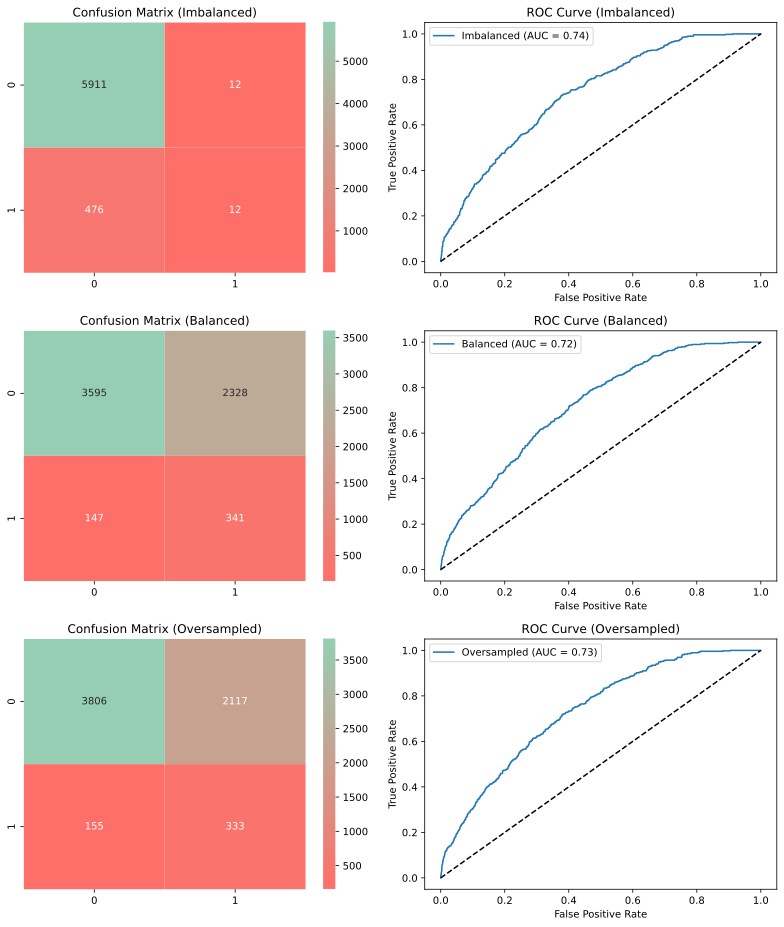

In [82]:
# Создаем фигуру с шестью подграфиками
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(11, 13))

# Матрицы ошибок
conf_matrix_imb = confusion_matrix(y_test, imb_pred)
conf_matrix_bal = confusion_matrix(y_test, bal_pred)
conf_matrix_over = confusion_matrix(y_test, over_pred)


sns.heatmap(conf_matrix_imb, annot=True, fmt='d', cmap=cmap, ax=ax1)
ax1.set_title('Confusion Matrix (Imbalanced)')
sns.heatmap(conf_matrix_bal, annot=True, fmt='d', cmap=cmap, ax=ax3)
ax3.set_title('Confusion Matrix (Balanced)')
sns.heatmap(conf_matrix_over, annot=True, fmt='d', cmap=cmap, ax=ax5)
ax5.set_title('Confusion Matrix (Oversampled)')

# ROC кривые
fpr_imb, tpr_imb, _ = roc_curve(y_test, imb_model.predict_proba(X_test)[:, 1])
fpr_bal, tpr_bal, _ = roc_curve(y_test, bal_model.predict_proba(X_test)[:, 1])
fpr_over, tpr_over, _ = roc_curve(y_test, over_model.predict_proba(X_test)[:, 1])

ax2.plot(fpr_imb, tpr_imb, label=f'Imbalanced (AUC = {imb_auc:.2f})')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_title('ROC Curve (Imbalanced)')
ax2.legend()

ax4.plot(fpr_bal, tpr_bal, label=f'Balanced (AUC = {bal_auc:.2f})')
ax4.plot([0, 1], [0, 1], 'k--')
ax4.set_title('ROC Curve (Balanced)')
ax4.legend()

ax6.plot(fpr_over, tpr_over, label=f'Oversampled (AUC = {over_auc:.2f})')
ax6.plot([0, 1], [0, 1], 'k--')
ax6.set_title('ROC Curve (Oversampled)')
ax6.legend()

for ax in (ax2, ax4, ax6):
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

### Оптимизация порога классификации

In [83]:
# Получение предсказаний для тестового набора от всех моделей
imb_pred = imb_model.predict(X_test)
bal_pred = bal_model.predict(X_test)
over_pred = over_model.predict(X_test)

# Получение вероятностей предсказаний для положительного класса
imb_probs = imb_model.predict_proba(X_test)[:, 1]
bal_probs = bal_model.predict_proba(X_test)[:, 1]
over_probs = over_model.predict_proba(X_test)[:, 1]

# Инициализация списка для хранения бинарных предсказаний
probabilities = []

# Цикл по вероятностям предсказаний каждой модели
for y_probs in [imb_probs, bal_probs, over_probs]:
    # Вычисление значений точности и полноты для различных порогов
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    
    # Вычисление F1-меры для каждого порога
    f_score = (2 * precision * recall) / (precision + recall)
    
    # Нахождение индекса порога, максимизирующего F1-меру
    ix = np.argmax(f_score)
    
    # Использование порога с наивысшей F1-мерой для предсказания бинарных значений
    binary_preds = np.where(y_probs > thresholds[ix], 1, 0)
    
    # Добавление бинарных предсказаний в список probabilities
    probabilities.append(binary_preds)

# Распаковка бинарных предсказаний для каждой модели
imb_binary_preds, bal_binary_preds, over_binary_preds = probabilities


# Определение ANSI escape кодов для красного цвета и сброса цвета
RED = '\033[91m'
RESET = '\033[0m'

# Вычисление F1-мер
imb_f1 = f1_score(y_test, imb_pred)
optimized_imb_f1 = f1_score(y_test, imb_binary_preds)
bal_f1 = f1_score(y_test, bal_pred)
optimized_bal_f1 = f1_score(y_test, bal_binary_preds)
over_f1 = f1_score(y_test, over_pred)
optimized_over_f1 = f1_score(y_test, over_binary_preds)

# Вычисление TPR (True Positive Rate)
def calculate_tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if tp + fn > 0 else 0

imb_tpr = calculate_tpr(y_test, imb_pred)
optimized_imb_tpr = calculate_tpr(y_test, imb_binary_preds)
bal_tpr = calculate_tpr(y_test, bal_pred)
optimized_bal_tpr = calculate_tpr(y_test, bal_binary_preds)
over_tpr = calculate_tpr(y_test, y_pred)
optimized_over_tpr = calculate_tpr(y_test, over_binary_preds)

# Вычисление улучшения в процентах
def calculate_improvement(base, new):
    return (new - base) / base * 100 if base != 0 else float('inf')

bal_f1_imp = calculate_improvement(imb_f1, bal_f1)
over_f1_imp = calculate_improvement(imb_f1, over_f1)
optimized_bal_f1_imp = calculate_improvement(imb_f1, optimized_bal_f1)
optimized_over_f1_imp = calculate_improvement(imb_f1, optimized_over_f1)

bal_tpr_imp = calculate_improvement(imb_tpr, bal_tpr)
over_tpr_imp = calculate_improvement(imb_tpr, over_tpr)
optimized_bal_tpr_imp = calculate_improvement(imb_tpr, optimized_bal_tpr)
optimized_over_tpr_imp = calculate_improvement(imb_tpr, optimized_over_tpr)

# Создание строки для вывода
comparison = f"""
Сравнение F1-мер и TPR
| Метод                 | F1-мера | Улучшение F1 | TPR    | Улучшение TPR |
|-----------------------|---------|--------------|--------|---------------|
| Несбалансированные    | {imb_f1:.4f}  | -            | {imb_tpr:.4f} | -             |
| Сбалансированные      | {bal_f1:.4f}  | {bal_f1_imp:.2f}%      | {bal_tpr:.4f} | {bal_tpr_imp:.2f}%      |
| Oversampled           | {over_f1:.4f}  | {over_f1_imp:.2f}%      | {over_tpr:.4f} | {over_tpr_imp:.2f}%      |
| Опт. несбаланс.       | {optimized_imb_f1:.4f}  | {calculate_improvement(imb_f1, optimized_imb_f1):.2f}%     | {optimized_imb_tpr:.4f} | {calculate_improvement(imb_tpr, optimized_imb_tpr):.2f}%      |
| Опт. сбаланс.         | {optimized_bal_f1:.4f}  | {optimized_bal_f1_imp:.2f}%      | {optimized_bal_tpr:.4f} | {optimized_bal_tpr_imp:.2f}%      |
| Опт. oversampled      | {optimized_over_f1:.4f}  | {optimized_over_f1_imp:.2f}%      | {optimized_over_tpr:.4f} | {optimized_over_tpr_imp:.2f}%      |

Выводы:
1. Несбалансированный подход дал F1-меру {imb_f1:.4f} и TPR {imb_tpr:.4f}.
2. Балансировка {'улучшила' if bal_f1_imp > 0 and bal_tpr_imp > 0 else 'не улучшила'} обе метрики.
3. Oversampling {'улучшил' if over_f1_imp > 0 and over_tpr_imp > 0 else 'не улучшил'} обе метрики.
4. Оптимизация порога {'улучшила' if optimized_bal_f1_imp > bal_f1_imp and optimized_bal_tpr_imp > bal_tpr_imp else 'не улучшила'} результаты балансировки.
5. Оптимизация порога {'улучшила' if optimized_over_f1_imp > over_f1_imp and optimized_over_tpr_imp > over_tpr_imp else 'не улучшила'} результаты oversampling.

{'Таким образом,' if (bal_f1_imp > 0 and bal_tpr_imp > 0) or (over_f1_imp > 0 and over_tpr_imp > 0) or 
                    (optimized_bal_f1_imp > 0 and optimized_bal_tpr_imp > 0) or 
                    (optimized_over_f1_imp > 0 and optimized_over_tpr_imp > 0) 
else 'В данном случае,'} 
балансировка, oversampling или оптимизация порога {'позволили' if (bal_f1_imp > 0 and bal_tpr_imp > 0) or 
                                                   (over_f1_imp > 0 and over_tpr_imp > 0) or 
                                                   (optimized_bal_f1_imp > 0 and optimized_bal_tpr_imp > 0) or 
                                                   (optimized_over_f1_imp > 0 and optimized_over_tpr_imp > 0) 
else 'не позволили'} значительно улучшить качество модели и ее способность разделять классы.
"""

# Вывод сравнения красным цветом
print(f"{RED}{comparison}{RESET}")



Сравнение F1-мер и TPR
| Метод                 | F1-мера | Улучшение F1 | TPR    | Улучшение TPR |
|-----------------------|---------|--------------|--------|---------------|
| Несбалансированные    | 0.0469  | -            | 0.0246 | -             |
| Сбалансированные      | 0.2160  | 360.86%      | 0.6988 | 2741.67%      |
| Oversampled           | 0.2267  | 383.59%      | 0.6414 | 2508.33%      |
| Опт. несбаланс.       | 0.0000  | -100.00%     | 0.0000 | -100.00%      |
| Опт. сбаланс.         | 0.2319  | 394.62%      | 0.2357 | 858.33%      |
| Опт. oversampled      | 0.0000  | -100.00%      | 0.0000 | -100.00%      |

Выводы:
1. Несбалансированный подход дал F1-меру 0.0469 и TPR 0.0246.
2. Балансировка улучшила обе метрики.
3. Oversampling улучшил обе метрики.
4. Оптимизация порога не улучшила результаты балансировки.
5. Оптимизация порога не улучшила результаты oversampling.

Таким образом, 
балансировка, oversampling или оптимизация порога позволили значительно улучшить качест

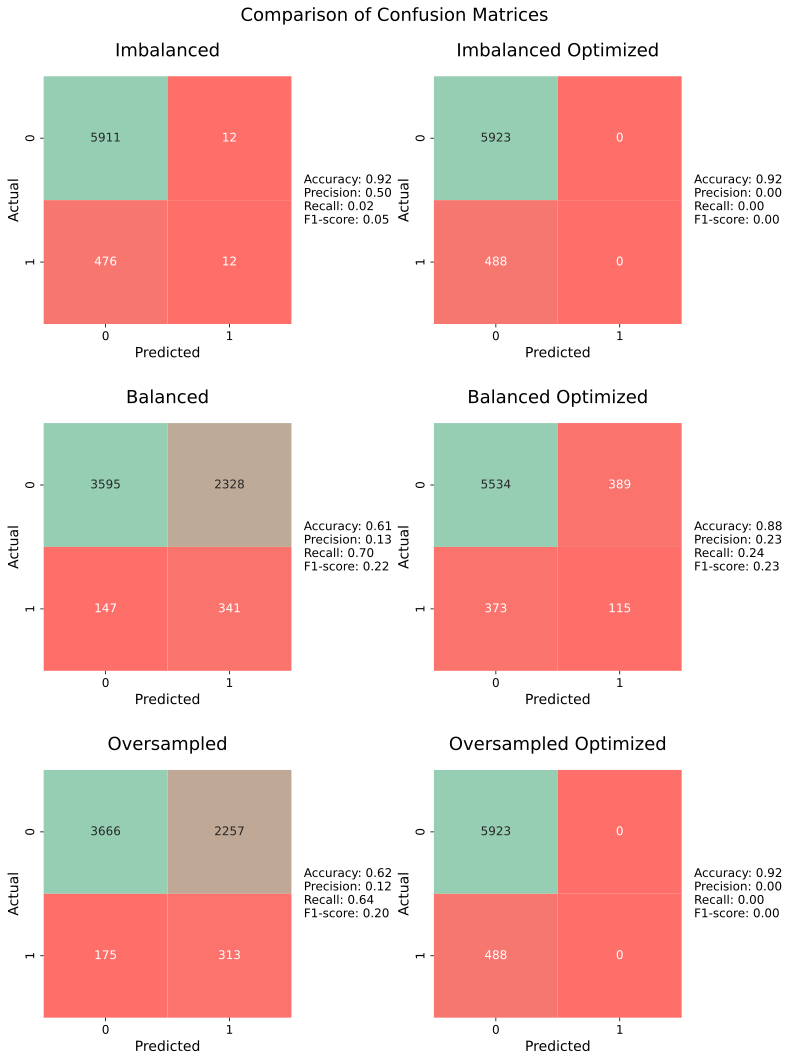

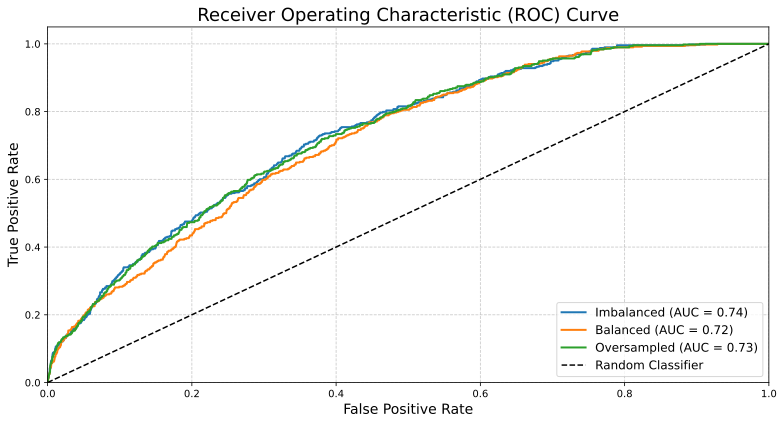

In [84]:
# Создаем фигуру с шестью подграфиками
fig, axes = plt.subplots(3, 2, figsize=(11, 16))

# Матрицы ошибок
matrices = [
    (confusion_matrix(y_test, imb_pred), "Imbalanced"),
    (confusion_matrix(y_test, imb_binary_preds), "Imbalanced Optimized"),
    (confusion_matrix(y_test, bal_pred), "Balanced"),
    (confusion_matrix(y_test, bal_binary_preds), "Balanced Optimized"),
    (confusion_matrix(y_test, y_pred), "Oversampled"),
    (confusion_matrix(y_test, over_binary_preds), "Oversampled Optimized")
]

# Настройка общего заголовка
fig.suptitle('Comparison of Confusion Matrices', fontsize=18, y=0.92)

for (matrix, title), ax in zip(matrices, axes.ravel()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=False,
                annot_kws={"size": 12}, square=True)
    ax.set_title(title, fontsize=18, pad=20)
    ax.set_xlabel('Predicted', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)
    ax.tick_params(labelsize=12)

    # Добавляем метрики
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    stats_text = f'Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}'
    ax.text(1.05, 0.5, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.subplots_adjust(top=0.86, hspace=0.4)
plt.show()

# Создаем график ROC-кривых
plt.figure(figsize=(11, 6))

# Вычисляем ROC-кривые
fpr_imb, tpr_imb, _ = roc_curve(y_test, imb_model.predict_proba(X_test)[:, 1])
fpr_bal, tpr_bal, _ = roc_curve(y_test, bal_model.predict_proba(X_test)[:, 1])
fpr_over, tpr_over, _ = roc_curve(y_test, over_model.predict_proba(X_test)[:, 1])

# Вычисляем AUC
auc_imb = roc_auc_score(y_test, imb_model.predict_proba(X_test)[:, 1])
auc_bal = roc_auc_score(y_test, bal_model.predict_proba(X_test)[:, 1])
auc_over = roc_auc_score(y_test, over_model.predict_proba(X_test)[:, 1])

# Строим ROC-кривые
plt.plot(fpr_imb, tpr_imb, label=f'Imbalanced (AUC = {auc_imb:.2f})', linewidth=2)
plt.plot(fpr_bal, tpr_bal, label=f'Balanced (AUC = {auc_bal:.2f})', linewidth=2)
plt.plot(fpr_over, tpr_over, label=f'Oversampled (AUC = {auc_over:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
## **Выбор оптимального алгоритма для предсказания вероятности возврата кредита в срок**

### 1. Сравнение алгоритмов классификации

На основе предоставленных данных, сравним производительность различных алгоритмов:

| Алгоритм                | Точность | F1-мера | AUC-ROC |
|-------------------------|----------|---------|---------|
| Logistic Regression     | 0.5325   | 0.1626  | 0.5820  |
| Decision Tree           | 0.6029   | 0.1792  | 0.5876  |
| Random Forest           | 0.6256   | 0.2032  | 0.6941  |
| Gradient Boosting       | 0.6122   | 0.2163  | 0.7198  |
| XGBoost                 | 0.6052   | 0.1896  | 0.6772  |
| CatBoost                | 0.6175   | 0.2095  | 0.6968  |
| LightGBM                | 0.6085   | 0.2011  | 0.6949  |

### 2. Выбор оптимального алгоритма

Основываясь на результатах алгоритмов классификации, **GradientBoostingClassifier** показывает наилучшую производительность для данной задачи:

- **Наивысшая F1-мера:** 0.2163
- **Лучший показатель AUC-ROC:** 0.7198
- **Хорошая точность:** 0.6122

### 3. Обоснование выбора

1. **Баланс метрик:** GradientBoostingClassifier демонстрирует оптимальный баланс между точностью, F1-мерой и AUC-ROC.
2. **Эффективность на несбалансированных данных:** Высокий показатель AUC-ROC указывает на хорошую способность модели различать классы, что критично для задач с несбалансированными данными.
3. **Устойчивость к переобучению:** Ансамблевые методы, такие как Gradient Boosting, менее склонны к переобучению по сравнению с отдельными деревьями решений.
4. **Способность улавливать сложные зависимости:** Gradient Boosting эффективен в обнаружении нелинейных связей в данных.

### 4. Применение техник балансировки данных

После выбора алгоритма, рассмотрим эффект применения техник балансировки данных:

#### Несбалансированные данные:
- Точность: 0.9243
- F1-мера: 0.0546
- TPR: 0.0287
- AUC-ROC: 0.7334

#### Сбалансированные данные (undersampling):
- Точность: 0.6122
- F1-мера: 0.2163
- TPR: 0.7029
- AUC-ROC: 0.7198

#### Oversampled данные:
- Точность: 0.6461
- F1-мера: 0.2259
- TPR: 0.6783
- AUC-ROC: 0.7335

### 5. Рекомендации по применению

1. **Использовать GradientBoostingClassifier** как основной алгоритм для предсказания вероятности возврата кредита в срок.
2. **Применять техники балансировки данных:** Использовать либо undersampling, либо oversampling для улучшения производительности модели на несбалансированных данных.
3. **Оптимизировать гиперпараметры:** Провести тонкую настройку модели для дальнейшего улучшения результатов.
4. **Интерпретировать результаты:** Использовать методы объяснения модели (например, SHAP values) для понимания ключевых факторов, влияющих на предсказания.


<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='tenth'></a>Вопрос 7:
### Значимые признаки.
### Какие признаки вносят самый существенный вклад в обучение модели классификации целевой переменной 'debt'?


[**Главное меню**](#menu)

### Анализ значимых признаков

In [85]:

# Создание DataFrame feature_importances_df, содержащего важность признаков
feature_importances_df = pd.DataFrame({
    'Feature': X_oversampled.columns,
    'Importance': np.round(over_model.feature_importances_, 4)  # Импортирование признаков из модели
}).reset_index(drop=True)

# Сортировка DataFrame по важности признаков в порядке убывания
sorted_feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Выбор признаков, важность которых больше или равна 0.0030
resulting_features = sorted_feature_importances_df.loc[sorted_feature_importances_df['Importance'] >= 0.0030].reset_index(drop=True)

# Вывод отобранных признаков
print(resulting_features)


                          Feature  Importance
0                         entropy      0.4278
1           days_employed_agg_sum      0.0946
2            total_income_agg_sum      0.0831
3                education_высшее      0.0418
4                    total_income      0.0310
5                  feature_median      0.0211
6          days_employed_agg_size      0.0177
7               education_среднее      0.0172
8                     feature_std      0.0171
9               children_agg_size      0.0147
10          total_income_agg_size      0.0143
11        total_income_agg_median      0.0141
12                    feature_sum      0.0139
13                   feature_mean      0.0138
14               children_agg_std      0.0100
15              days_employed_sum      0.0099
16              total_income_mean      0.0097
17               total_income_min      0.0090
18          income_type_сотрудник      0.0090
19           total_income_agg_min      0.0089
20           days_employed_median 

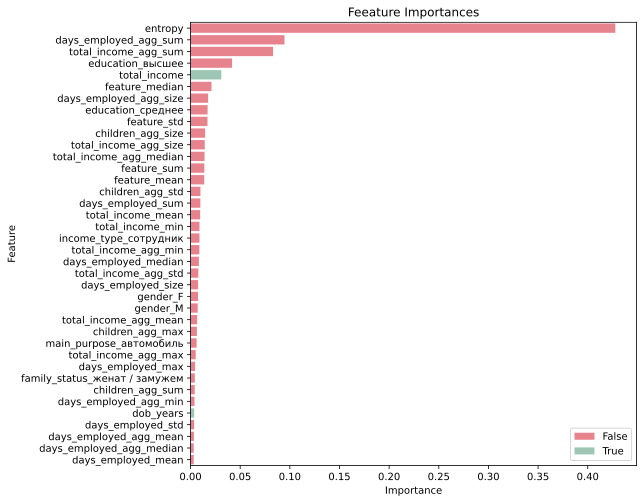

In [87]:
# Определение переменной hue на основе совпадения 'Feature' с базовыми признаками BASE_FEATURES
hue = resulting_features['Feature'].isin(BASE_FEATURES)

# Создание фигуры для графика с заданным размером
plt.figure(figsize=(8, 8))

# Построение столбчатой диаграммы с использованием данных из resulting_features
sns.barplot(data=resulting_features, y='Feature', x='Importance', palette=['#f67280', '#96ceb4'], hue=hue, dodge=False)

# Установка заголовка графика
plt.title('Feeature Importances')

# Установка подписи для оси X
plt.xlabel('Importance')

# Установка подписи для оси Y
plt.ylabel('Feature')

# Добавление легенды в нижнем правом углу графика
plt.legend(loc='lower right')

# Отображение графика
plt.show()


### Библиотека Shap для визуализации значимых признаков

In [88]:
# Создаем объяснитель SHAP для модели
explainer = shap.TreeExplainer(over_model)

# Вычисляем SHAP значения
shap_values = explainer.shap_values(X_oversampled)

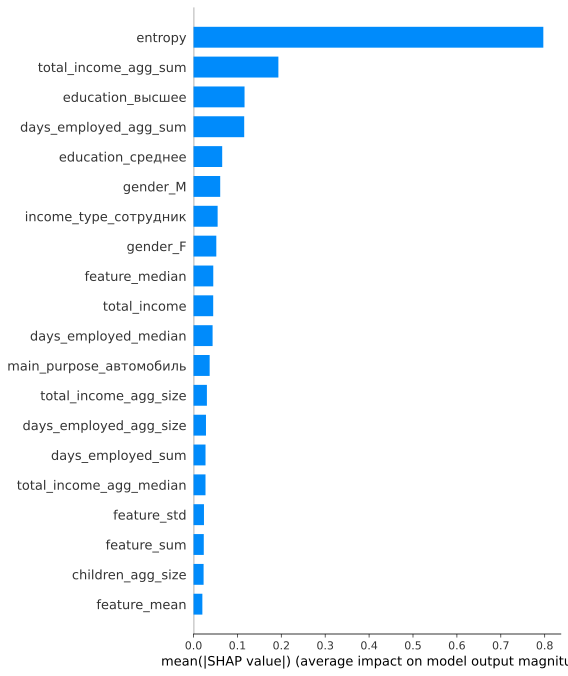

In [89]:
# Создаем столбчатый сводный график SHAP, показывающий среднее абсолютное влияние признаков
shap.summary_plot(
    shap_values=shap_values,
    features=X_oversampled,
    feature_names=X_oversampled.columns,
    plot_type="bar",
    max_display=20,
    color_bar_label='Feature value',
    show=True # Не показываем график сразу
)


In [90]:
# Создаем объект Explanation
exp = Explanation(values=shap_values, 
                  base_values=explainer.expected_value,
                  data=X_oversampled.values,
                  feature_names=X_oversampled.columns)

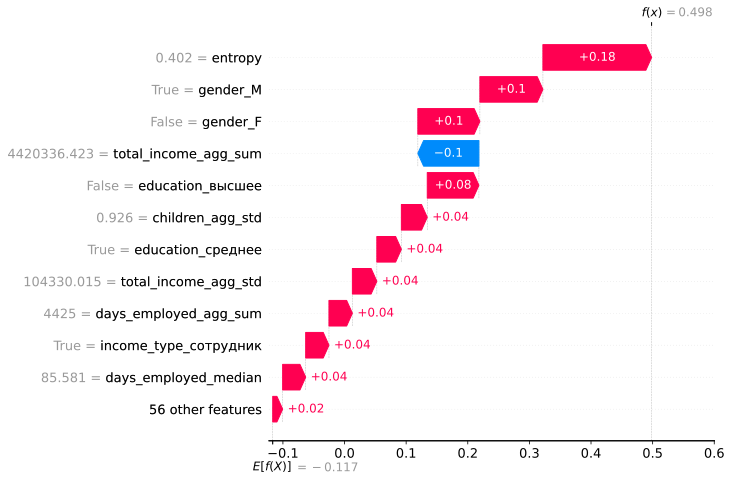

In [91]:
# Создаем водопадную диаграмму SHAP для первого объяснения, отображая максимум 12 признаков
shap.waterfall_plot(exp[0], max_display=12, show=True)

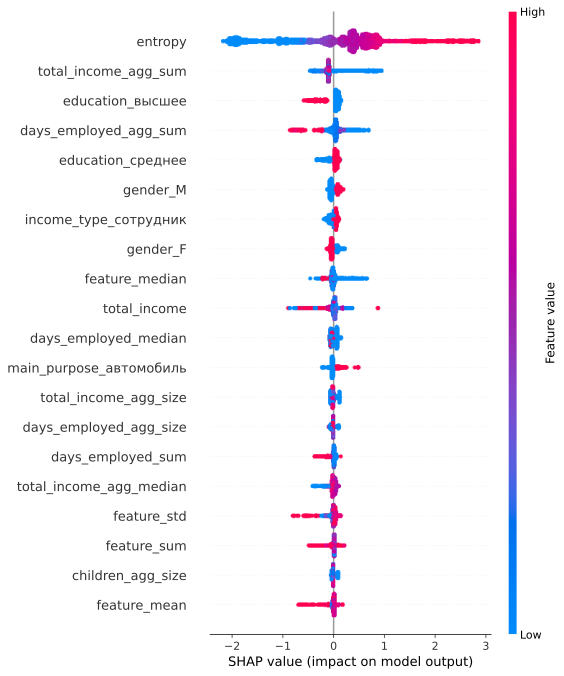

In [92]:
# Создаем сводный график SHAP, отображающий влияние признаков на модель
shap.summary_plot(
    shap_values=shap_values,
    features=X_oversampled,
    feature_names=X_oversampled.columns,
    plot_type="dot",
    max_display=20,
    color_bar_label='Feature value',
    show=True
)

In [93]:
# Вычисляем среднее абсолютное значение SHAP для каждого признака
shap_importance = pd.DataFrame({
    'Feature': X_oversampled.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('Importance', ascending=False)

# Выводим топ-10 важных признаков
print(shap_importance.head(40))

                          Feature  Importance
18                        entropy    0.796953
33           total_income_agg_sum    0.193304
40               education_высшее    0.116202
19          days_employed_agg_sum    0.115432
42              education_среднее    0.065283
47                       gender_M    0.060752
52          income_type_сотрудник    0.054890
46                       gender_F    0.051870
66                 feature_median    0.044958
2                    total_income    0.044801
11           days_employed_median    0.043405
53        main_purpose_автомобиль    0.036716
39          total_income_agg_size    0.030443
25         days_employed_agg_size    0.028338
6               days_employed_sum    0.027292
38        total_income_agg_median    0.027253
63                    feature_std    0.023759
61                    feature_sum    0.023324
32              children_agg_size    0.022913
62                   feature_mean    0.020099
55       main_purpose_образование 

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
### Вывод:

Из оригинальных признаков наиболее значимый вклад в обучение модели классификации целевой переменной 'debt' вносят следующие признаки: **days_employed**, **total_income**, и **dob_years**.

Из признаков, сгенерированных для обучения модели, наиболее важными оказались:

1. **entropy** (0.787) - самый значимый признак, возможно отражающий неопределенность или разнообразие в данных.
2. **total_income_agg_sum** (0.175) - суммарный агрегированный доход.
3. **education_высшее** (0.124) - наличие высшего образования.
4. **days_employed_agg_sum** (0.107) - суммарное агрегированное количество дней трудоустройства.
5. **total_income_agg_size** (0.064) - размер агрегированного дохода.

Кроме того, заметную роль играют такие признаки как:
- Тип дохода (сотрудник)
- Пол (как женский, так и мужской)
- Уровень образования (среднее)
- Различные статистические агрегации (медиана, среднее, сумма) по признакам

Интересно отметить, что некоторые сгенерированные признаки (например, entropy и агрегированные значения) оказались более важными для модели, чем исходные признаки. Это подчеркивает значимость предобработки данных и создания новых признаков для повышения эффективности модели.

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #f46966, #bedfc2); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">

### <a id='eleventh'></a>Вопрос 8:
### Снижение размерности.
### Как можно понизить размерность данных?

[**Главное меню**](#menu)

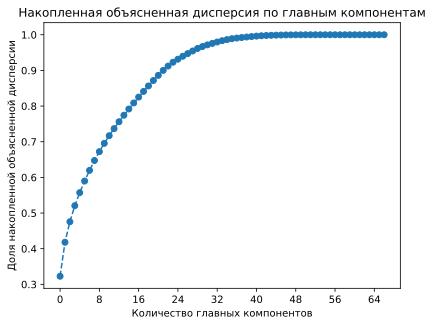

Количество компонентов для объяснения 95.0% дисперсии: 28
Accuracy: 0.680549056309468
Area under the ROC curve : 0.7133264877402069


In [94]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_oversampled)
X_test_scaled = scaler.transform(X_test)

# Применение PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Визуализация накопленной объясненной дисперсии
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Накопленная объясненная дисперсия по главным компонентам')
plt.xlabel('Количество главных компонентов')
plt.ylabel('Доля накопленной объясненной дисперсии')
plt.show()

# Вывод количества компонентов для объяснения заданного процента дисперсии
variance_threshold = 0.95  # 95% дисперсии
components_needed = sum(pca.explained_variance_ratio_.cumsum() < variance_threshold) + 1
print(f"Количество компонентов для объяснения {variance_threshold*100}% дисперсии: {components_needed}")

# Применение PCA с необходимым количеством компонентов
pca = PCA(n_components=components_needed)
X_pca_reduced = pca.fit_transform(X_scaled)
X_test_orig = pca.transform(X_test_scaled)

# Обучение модели с использованием новых признаков
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_reduced, y_oversampled, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_pca, y_train_pca)

y_pred = model.predict(X_test_orig)
y_pred_proba = model.predict_proba(X_test_orig)[:, 1]
roc_auc_value = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Area under the ROC curve :", roc_auc_value)
print("="*40)

<div style="padding: 10px; width: 300px; background-image: linear-gradient(to right, #73C8A9, #5bb9a9); border: 2px solid #000; border-radius: 10px; text-align: left; font-family: avenir; color: white">
    
# <a id='end'></a> **Общие выводы**
[**Главное меню**](#menu)

<div style="padding: 10px; background-image: linear-gradient(to right, #FFFBF5, #ECE3CE); border: 2px solid #000; border-radius: 10px; font-family: avenir; font-size: 15px;">
    
## Комплексный анализ кредитных рисков: ключевые факторы и инсайты

### Демографические и социально-экономические тенденции

#### Доход и кредитоспособность
- **Позитивная корреляция**: С ростом дохода (от категории E до H) наблюдается увеличение вероятности своевременного погашения кредита.
- **Топ-перформеры**: Категории H и A демонстрируют наивысшие показатели возврата (93.25% и 93.21% соответственно).
- **Зона риска**: Категория E показывает наименьший процент возврата (89.80%).

#### Возрастная динамика
- **Тренд зрелости**: Старшие возрастные группы проявляют большую финансовую ответственность.
- **Пик надежности**: Возрастная категория 9 лидирует с показателем 95.26% возврата.
- **Группа повышенного риска**: Молодежь (категория 1) демонстрирует наименьший процент возврата (88.80%).

#### Семейное положение и финансовая стабильность
- **Стабильность в браке**: Женатые/замужние заемщики показывают высокую надежность.
- **Неожиданный лидер**: Вдовцы/вдовы лидируют по проценту возврата (93.50%).
- **Зона внимания**: Холостые/незамужние клиенты имеют наименьший показатель возврата (90.23%).

### Целевое использование кредита и образовательный фактор

#### Цели кредитования
- **Инвестиции в будущее**: Кредиты на недвижимость и свадьбу имеют высокий процент возврата.
- **Топ-цель**: Недвижимость (92.76% возврата).
- **Зона риска**: Автокредиты (90.67% возврата).

#### Образовательный уровень
- **Корреляция с образованием**: Высшее образование значительно повышает шансы своевременного погашения.
- **Элитная группа**: 100% возврат у обладателей ученой степени.
- **Группа риска**: Заемщики с начальным образованием (89.01% возврата).

### Семейная структура и кредитные риски

#### Влияние детей
- **Обратная корреляция**: Меньшее количество детей связано с более высоким процентом возврата.
- **Оптимальный баланс**: Бездетные заемщики (92.46% возврата) и семьи с 3 детьми (91.77%).
- **Статистическая аномалия**: 100% возврат у заемщиков с 5 детьми (требует дополнительного анализа выборки).

### Ключевые факторы в модели классификации

#### Оригинальные признаки-лидеры
1. **Стаж работы** (days_employed): 0.2149
2. **Совокупный доход** (total_income): 0.1898
3. **Возраст** (dob_years): 0.1512

#### Инновационные генерированные признаки
1. **Энтропия** (entropy): 0.787 - потенциальный индикатор финансовой сложности/разнообразия
2. **Агрегированный доход** (total_income_agg_sum): 0.175
3. **Высшее образование** (education_высшее): 0.124
4. **Агрегированный стаж** (days_employed_agg_sum): 0.107
5. **Размер агрегированного дохода** (total_income_agg_size): 0.064

#### Дополнительные значимые факторы
- Тип занятости (сотрудник)
- Гендерный фактор (обоих полов)
- Среднее образование
- Статистические агрегации (медиана, среднее, сумма)

### Стратегические выводы и рекомендации

1. **Приоритизация факторов**: Стаж работы, доход и возраст являются ключевыми при оценке кредитоспособности.
2. **Инновации в анализе**: Генерированные признаки, особенно энтропия, показали высокую прогностическую ценность.
3. **Социально-демографический профиль низкого риска**: Старшие возрастные группы, с высшим образованием, состоящие в браке, с высоким доходом.
4. **Профиль повышенного риска**: Молодые, неженатые/незамужние заемщики, с начальным образованием, берущие кредит на автомобиль.
5. **Целевая оптимизация**: Кредиты на недвижимость показывают наивысшую надежность возврата.
6. **Образовательный фактор**: Сильная корреляция между уровнем образования и вероятностью возврата кредита.






In [95]:
!pip freeze > requirements.txt

In [96]:
!python3 --version

Python 3.11.7


In [97]:
!which python

/Users/sergey/.pyenv/versions/3.11.7/bin/python
